# Question 1: Probability practice

## Part A

Rule of Total Probability dictates that $(P(A) = P(A|B) \times P(B) + P(A|not B) \times P(not B)$, so in this question, $P(YES) = P(YES|TC) \times P(TC) + P(YES|RC) \times P(RC)$, which also equals to $0.65 = 0.5\times0.3 + P(YES|TC) \times P(TC)$.

Also, $P(TC) = P(not RC) = 1 - P(RC) = 1 - 0.3$, so we can have $P(TC) = 0.7$. Moving forward, we get $P(Yes|TC) = (0.65 - 0.5\times0.3) \div 0.7 = 71.43$%.

## Part B

Baye's Theorem suggests that $P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$, so in this question, $P(Sick|Positive) = \frac{P(Positive|Sick) \times P(Sick)}{P(Positive)}$. By Rule of Total Probability, $P(Positive) = 0.993 \times 0.000025 + 0.0001 \times (1 - 0.000025)$; so we have $P(Sick|Positive) = \frac{0.993 \times 0.000025}{0.993 \times 0.000025 + 0.0001 \times (1 - 0.000025)} = 19.89$%

# Question 2 : Wrangling the Billboard Top 100



## Part A

In [14]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
!git clone https://github.com/dpuelz/STA380.git

Populating the interactive namespace from numpy and matplotlib
Cloning into 'STA380'...
remote: Enumerating objects: 35402, done.
remote: Counting objects: 100% (8377/8377), done.
remote: Compressing objects: 100% (7025/7025), done.
remote: Total 35402 (delta 1276), reused 8313 (delta 1249), pack-reused 27025
Receiving objects: 100% (35402/35402), 346.18 MiB | 29.02 MiB/s, done.
Resolving deltas: 100% (1279/1279), done.
Updating files: 100% (35707/35707), done.


In [22]:
billboard = pd.read_csv('https://github.com/dpuelz/STA380/blob/master/data/billboard.csv?raw=true')
billboard_w = billboard[['week_id', 'performer', 'song', 'year', 'week', 'week_position']]

In [3]:
# wrangle data into only columns relavent, indexed by week_id
# billboard_w.set_index('week_id', inplace=True)

In [4]:
tops = billboard_w.groupby(['performer', 'song'])[['year']].count()
tops.rename(columns={'year':'count'}, inplace=True)

In [5]:
top_10 = tops.sort_values('count', ascending=False).head(10).style.set_caption('10 Most Popular Songs from 1958 to 2021')
top_10

## Part B

In [6]:
middle_years = billboard_w[(billboard_w['year'] != 1958) & (billboard_w['year'] != 2021)]
unique_songs = middle_years.groupby('year')[['song']].nunique()

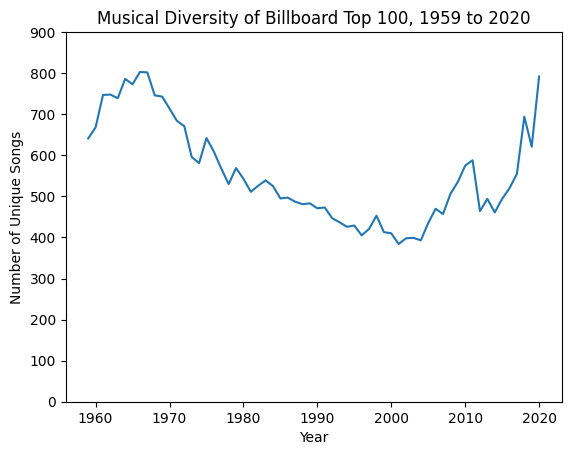

In [7]:
import matplotlib.pyplot as plt
plt.plot(unique_songs)
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.title('Musical Diversity of Billboard Top 100, 1959 to 2020')
plt.ylim(0, 900)
plt.show()

In observing the chart, we see that musical diversity in the Billboard Top 100 peaked in the late 1960s, decreased through the following decades until around 2000, and then began to rise again. These fluctuations suggest the influence of broader cultural, technological, and industry shifts on the musical landscape.

The peak in the late 1960s coincided with significant social and cultural changes, including the civil rights movement, the 1960s counterculture, and the anti-Vietnam War movement. These influences likely stimulated the creation and popularity of diverse music. However, the following decades saw a decline in diversity, which may have been due to industry commercialization and the dominance of certain music genres like disco and pop.

Around the late 1990s and early 2000s, we observe an upturn in musical diversity. This period aligns with the advent of digital music platforms such as Napster and iTunes, which revolutionized how music was distributed and consumed, leading to a broader range of music reaching the charts.

Additionally, changes in Billboard's ranking methodology could have influenced these trends. Initially, rankings were heavily reliant on sales of singles and later incorporated radio airplay, which might have limited diversity. However, the inclusion of digital sales and streams in more recent years has likely contributed to the resurgence in musical diversity.

These interpretations, resulting from our group discussion, provide a potential explanation for the observed trends, linking them to significant societal, technological, and industry changes over time.

## Part C

In [8]:
week_count = billboard_w.groupby(['performer', 'song'])[['week_id']].count()

In [9]:
week_count.reset_index()

performer  \
0                                        "Groove" Holmes   
1                                        "Groove" Holmes   
2                                 "Little" Jimmy Dickens   
3                                        "Pookie" Hudson   
4                                    "Weird Al" Yankovic   
...                                                  ...   
29384                            will.i.am & Nicki Minaj   
29385                  will.i.am Featuring Justin Bieber   
29386   will.i.am Featuring Mick Jagger & Jennifer Lopez   
29387                    will.i.am Featuring Miley Cyrus   
29388  will.i.am Featuring Miley Cyrus, French Montan...   

                                            song  week_id  
0                                          Misty       11  
1                               What Now My Love        3  
2      May The Bird Of Paradise Fly Up Your Nose       10  
3                                  I Know I Know        1  
4                                 Amish Paradise       16  
...                                          ...      ...  
29384                               Check It Out       15  
29385                                 #thatPOWER       16  
29386                   T.H.E (The Hardest Ever)        8  
29387                                  Fall Down        1  
29388                             Feelin' Myself        2  

[29389 rows x 3 columns]

In [10]:
ten_hit = week_count[week_count['week_id']>=10].reset_index()

In [11]:
pop_performers = ten_hit.groupby('performer')[['song']].count()

In [12]:
the_19 = pop_performers[pop_performers['song']>=30].reset_index()

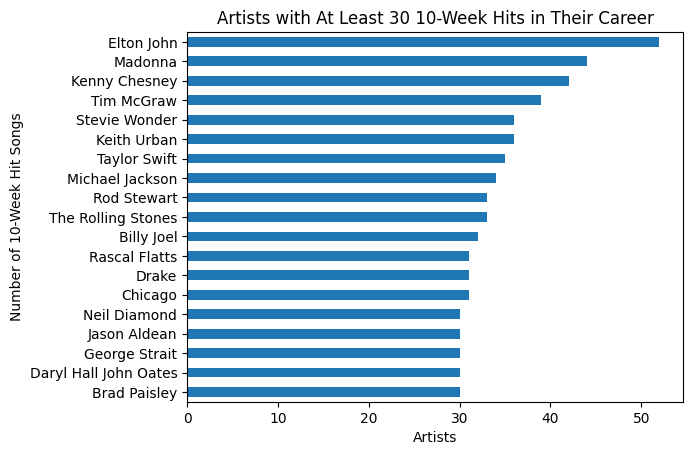

In [13]:
the_19.sort_values(by='song', inplace=True)
the_19.plot(kind='barh', x='performer', y='song', legend=False)
plt.xlabel('Artists')
plt.ylabel('Number of 10-Week Hit Songs')
plt.title('Artists with At Least 30 10-Week Hits in Their Career')
plt.show()

# Question 3 : Visual story telling part 1 - Green Buildings

## Basic EDA - Rent

In [ ]:
gb = pd.read_csv('https://github.com/dpuelz/STA380/blob/master/data/greenbuildings.csv?raw=true')

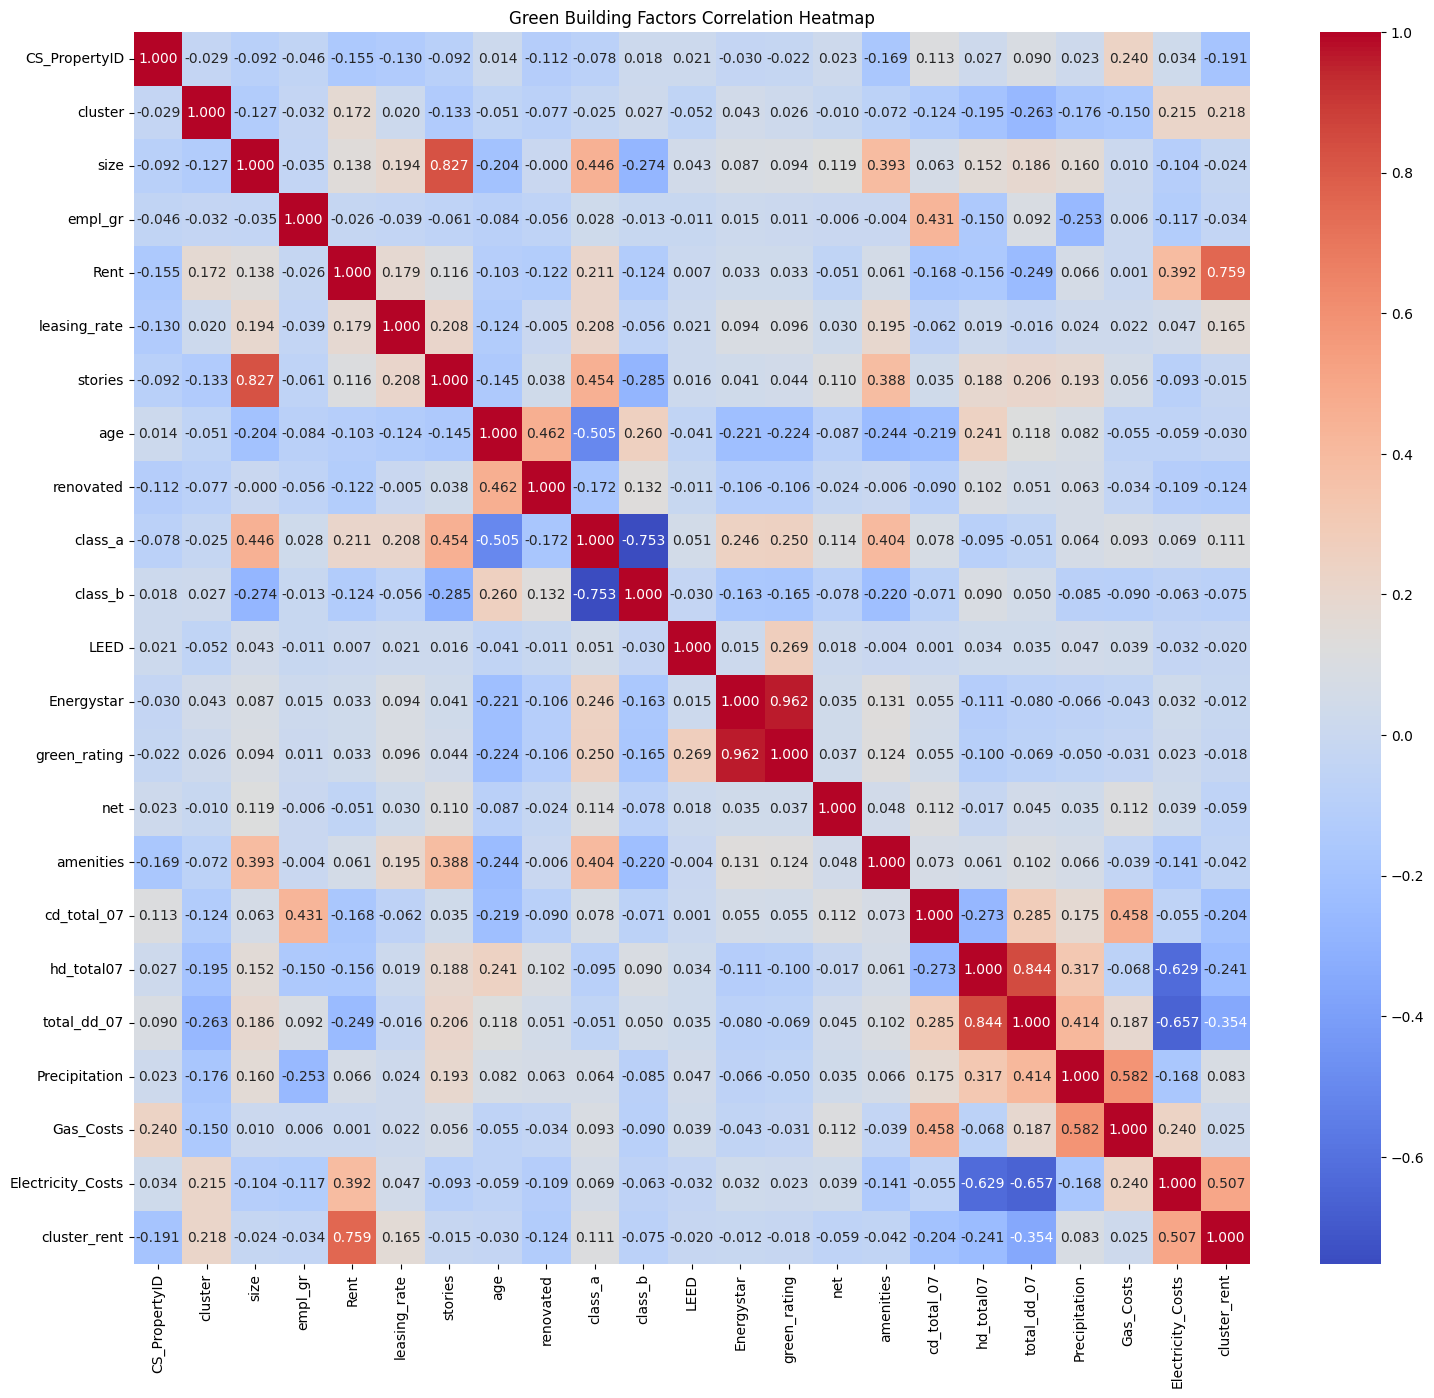

In [ ]:
import seaborn as sns
plt.figure(figsize=(18, 16))  # Adjust the figure size as per your preference
sns.heatmap(gb.corr(), annot=True, cmap='coolwarm', fmt='.3f')  # cmap can be any colormap of your choice
plt.title('Green Building Factors Correlation Heatmap')
plt.show()

In [ ]:
gb

CS_PropertyID  cluster     size  empl_gr    Rent  leasing_rate  stories  \
0            379105        1   260300     2.22   38.56         91.39       14   
1            122151        1    67861     2.22   28.57         87.14        5   
2            379839        1   164848     2.22   33.31         88.94       13   
3             94614        1    93372     2.22   35.00         97.04       13   
4            379285        1   174307     2.22   40.69         96.58       16   
...             ...      ...      ...      ...     ...           ...      ...   
7889         157117     1230  1300000     1.15  137.51        100.00       41   
7890         158379     1230    16140     1.15  152.73         75.22        8   
7891          52316     1230    15726     1.15  158.92        100.00        6   
7892         158124     1230    51300     1.15  198.99        100.00       12   
7893         157086     1230  1876972     1.15  250.00         99.84       45   

      age  renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0      16          0        1  ...             1    0          1         4988   
1      27          0        0  ...             0    0          1         4988   
2      36          1        0  ...             0    0          1         4988   
3      46          1        0  ...             0    0          0         4988   
4       5          0        1  ...             0    0          1         4988   
...   ...        ...      ...  ...           ...  ...        ...          ...   
7889   35          0        1  ...             0    0          0         1299   
7890   90          1        0  ...             0    0          0         1299   
7891   67          0        0  ...             0    0          0         1299   
7892   91          0        0  ...             0    0          0         1299   
7893   34          1        1  ...             0    0          1         1299   

      hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \
0             58         5046          42.57   0.013700           0.029000   
1             58         5046          42.57   0.013731           0.029045   
2             58         5046          42.57   0.013731           0.029045   
3             58         5046          42.57   0.013731           0.029045   
4             58         5046          42.57   0.013731           0.029045   
...          ...          ...            ...        ...                ...   
7889        4796         6095          48.35   0.011757           0.045457   
7890        4796         6095          48.35   0.011757           0.045457   
7891        4796         6095          48.35   0.011757           0.045457   
7892        4796         6095          48.35   0.011757           0.045457   
7893        4796         6095          48.35   0.011757           0.045457   

      cluster_rent  
0            36.78  
1            36.78  
2            36.78  
3            36.78  
4            36.78  
...            ...  
7889         58.72  
7890         58.72  
7891         58.72  
7892         58.72  
7893         58.72  

[7894 rows x 23 columns]

According to the heatmap, we can see several important factors that correlates with the rent. So in the next part we focus on how these factors individually affect rents.

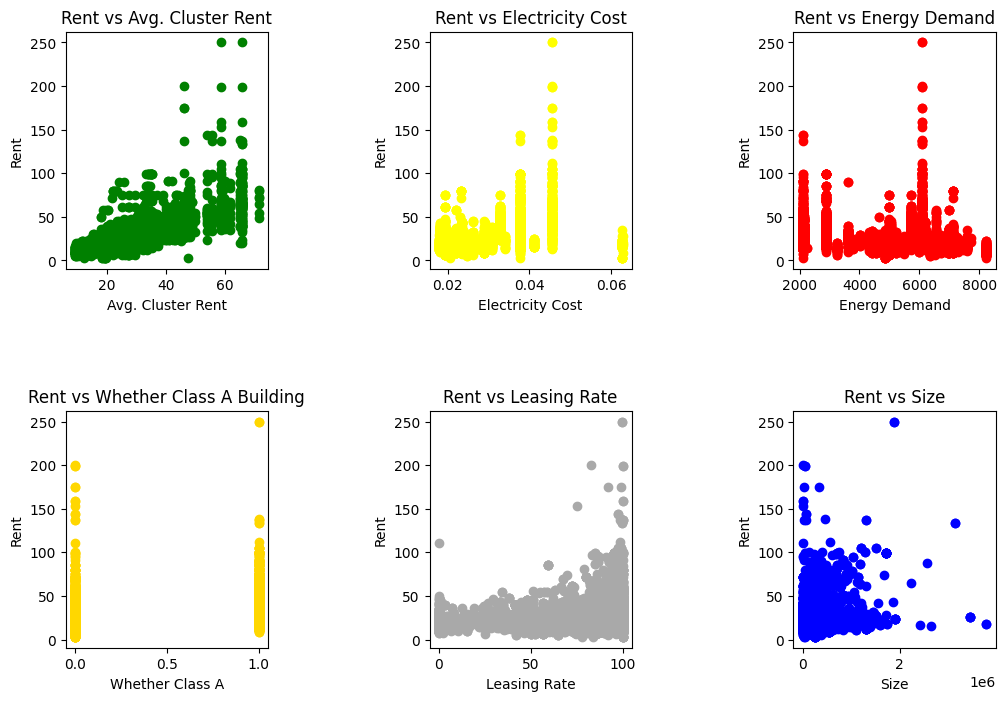

In [ ]:
# First, create a blank figure and "axis" objects
import matplotlib.pyplot as plt
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=False,sharey=False,figsize=(12, 8))

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.plot(gb['cluster_rent'], gb['Rent'], marker='o', color='green', linestyle='None')
ax1.set_title('Rent vs Avg. Cluster Rent')
ax1.set_xlabel('Avg. Cluster Rent')
ax1.set_ylabel('Rent')

ax2.plot(gb['Electricity_Costs'], gb['Rent'], marker='o', color='yellow', linestyle='None')
ax2.set_title('Rent vs Electricity Cost')
ax2.set_xlabel('Electricity Cost')
ax2.set_ylabel('Rent')

ax3.plot(gb['total_dd_07'], gb['Rent'], marker='o', color='red', linestyle='None')
ax3.set_title('Rent vs Energy Demand')
ax3.set_xlabel('Energy Demand')
ax3.set_ylabel('Rent')

ax4.plot(gb['class_a'], gb['Rent'], marker='o', color='gold', linestyle='None')
ax4.set_title('Rent vs Whether Class A Building')
ax4.set_xlabel('Whether Class A')
ax4.set_ylabel('Rent')

ax5.plot(gb['leasing_rate'], gb['Rent'], marker='o', color='darkgrey', linestyle='None')
ax5.set_title('Rent vs Leasing Rate')
ax5.set_xlabel('Leasing Rate')
ax5.set_ylabel('Rent')

ax6.plot(gb['size'], gb['Rent'], marker='o', color='blue', linestyle='None')
ax6.set_title('Rent vs Size')
ax6.set_xlabel('Size')
ax6.set_ylabel('Rent')

plt.subplots_adjust(hspace=0.6, wspace=0.8)

plt.show()

### Interpretations:


1.   If the cluster average rent is high, the rent is likely to be high
2.   Electricity cost in general drives up the rent, while energy demand drives down the rent (the correlation with energy demand follows basic economic theory, but the case of electricity cost could be that those tend to have high electricity usage already signed contracts that include utility bills)
3.   A class A building tend to have higher rent than others
4.   The higher the leasing rate, the higher the rent
5.   Size also positively correlates with rent, although there are some small "palatial" buildings that have high rents



## Basic EDA - Leasing Rate
$Leasing Rate=90\%$ is a bold and important assumption that the stats guru has hold in their calculation. So the second part of EDA will be to investigate into whether that assumption is well-grounded.

In [ ]:
use_gb = gb[gb['leasing_rate']>=10]
avg_age = use_gb[use_gb['age']<=10].groupby('age')[['leasing_rate']].mean()
avg_age.reset_index(inplace=True)
avg_size = use_gb[(use_gb['size']<350000) & (use_gb['size']>150000)]
def rounding(value):
  return (value//10000)*10000
avg_size['size'] = avg_size['size'].apply(rounding)
avg_size = avg_size.groupby('size')[['leasing_rate']].mean()
avg_size.reset_index(inplace=True)
avg_stories = use_gb[use_gb['stories']<25].groupby('stories')[['leasing_rate']].mean()
avg_stories.reset_index(inplace=True)

<ipython-input-34-6ca351b1289b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_size['size'] = avg_size['size'].apply(rounding)


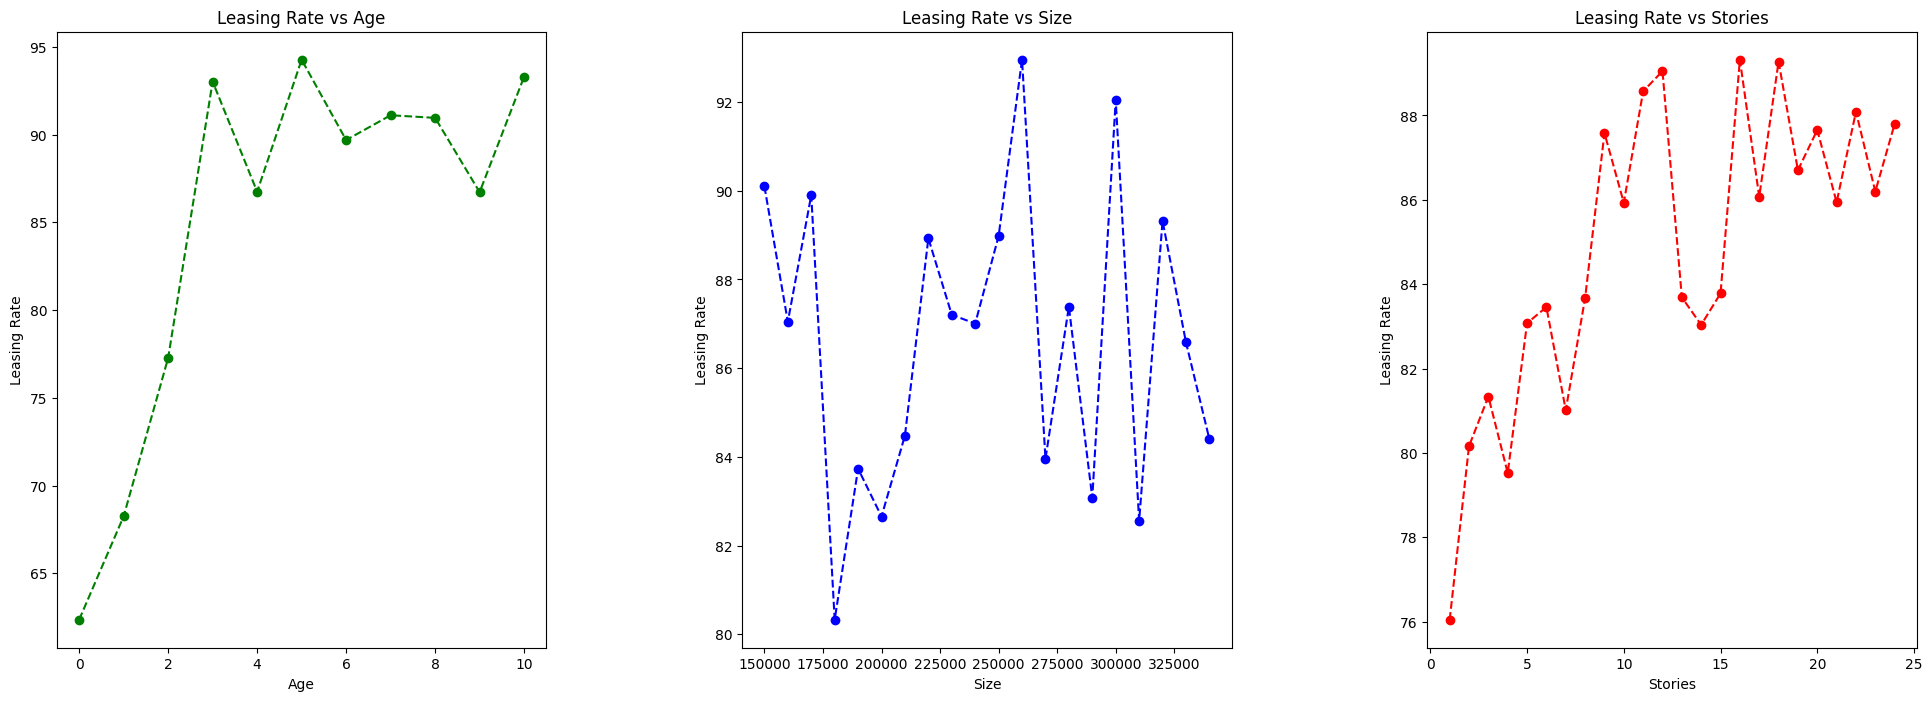

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=False,sharey=False,figsize=(24, 8))

ax1.plot(avg_age['age'], avg_age['leasing_rate'], marker='o', color='green', linestyle='--')
ax1.set_title('Leasing Rate vs Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Leasing Rate')

ax2.plot(avg_size['size'], avg_size['leasing_rate'], marker='o', color='blue', linestyle='--')
ax2.set_title('Leasing Rate vs Size')
ax2.set_xlabel('Size')
ax2.set_ylabel('Leasing Rate')

ax3.plot(avg_stories['stories'], avg_stories['leasing_rate'], marker='o', color='red', linestyle='--')
ax3.set_title('Leasing Rate vs Stories')
ax3.set_xlabel('Stories')
ax3.set_ylabel('Leasing Rate')

plt.subplots_adjust(hspace=0.6, wspace=0.4)

plt.show()

### Interpretations:
1. A newly built building is likely to start with around 60% leasing rate, and could take about 3 years to reach 90%.
2. A 250,000 sq.ft. building on average has a leasing rate about 85%.
3. A 15-story building on average has about 83% leasing rate (interestingly, leasing rate for buildings around 15 stories is lower than those with a little more stories as well as those with a little less).

## EDA Summaries - Challenges for the Stats Guru
1. Cluster obviously affect building rents. Without understanding if the new building is located in a cheap or expensive community, it is too arbitrary to estimate the rent using average rent across the entire city.
2. There are quite a few other variables such as electricity cost, energy demand, and building class that can influence the rent. However, the stats guru does not account or provide any assumptions for any of these factors.
3. Leasing rate seems to have a noticeable deviance from the 90% assumption. It seems like a building of this size and dimension does not have as high as 90% occupancy. Moreover, the stats guru completely ignores the fact that newly built buildings will need some time to become properly leased out.

To this point, we can throw several questions like above to the stats guru's calculation. Their failure to take into consideration enough related determinants has made the calculation too simple and questionable. Even if all other factors they did not account for has in reality no effect on rents, their calculation for the payback period follows a straight line method - which is problematic as we know the leasing rate grows over time, and therefore, we are almost sure that they have undercalculated the recuperation period.
Another problem to the guru's analysis is they did not fully explain why a green certificate is worth investing on or not. The next part will try to decipher the relationship between a building's greenness and rent, and see if a green building can provide a "green premium" over the 5% cost of certification.

## Does Greenness Affect Rent?
Here we will discover the difference in rent between green buildings, and see if there is a potential pattern. Specifically, we conduct this analysis on the scales of both across the city and within a cluster.

In [ ]:
by_cluster_green = use_gb[use_gb['green_rating']==1].groupby('cluster')[['Rent']].mean()
by_cluster_notgreen = use_gb[use_gb['green_rating']==0].groupby('cluster')[['Rent']].mean()
by_cluster_green.reset_index(inplace=True)
by_cluster_notgreen.reset_index(inplace=True)

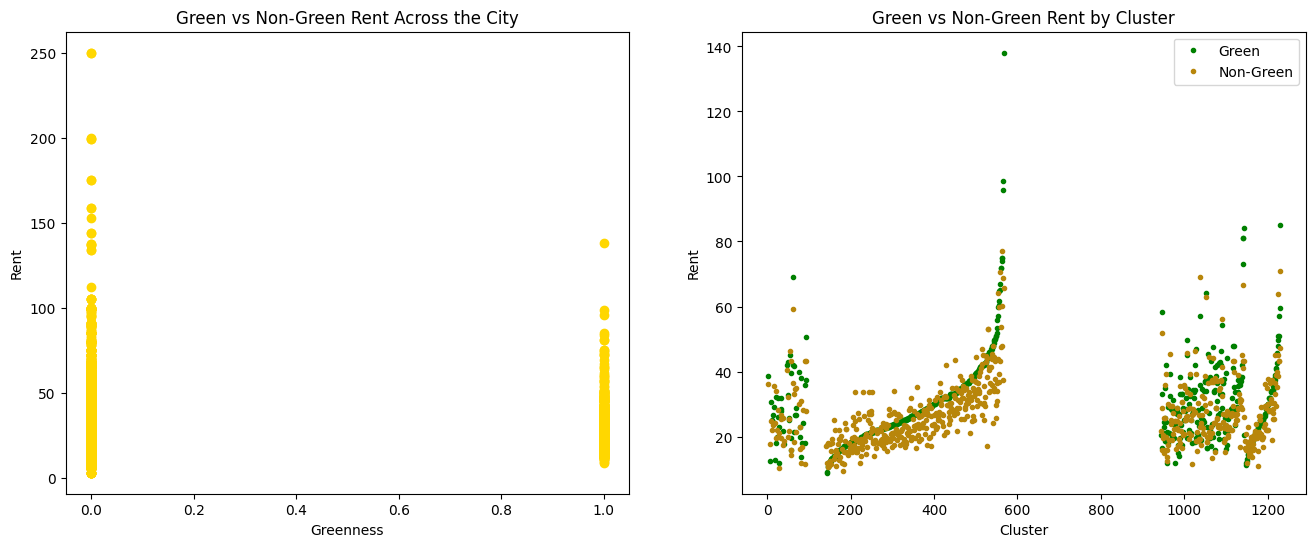

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False,sharey=False,figsize=(16, 6))

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.plot(use_gb['green_rating'], use_gb['Rent'], marker='o', color='gold', linestyle='None')
ax1.set_title('Green vs Non-Green Rent Across the City')
ax1.set_xlabel('Greenness')
ax1.set_ylabel('Rent')

ax2.plot(by_cluster_green['cluster'], by_cluster_green['Rent'], marker='o', color='green', markersize=3, linestyle='None', label='Green')
ax2.plot(by_cluster_notgreen['cluster'], by_cluster_notgreen['Rent'], marker='o', color='darkgoldenrod', markersize=3, linestyle='None', label='Non-Green')
ax2.set_title('Green vs Non-Green Rent by Cluster')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Rent')
ax2.legend()

plt.subplots_adjust(wspace=0.2)

plt.show()

In both plots, we can see that green buildings seem to have a premium over non-green ones. Especially in the by-cluster plot, we can see the green points are in general above the brown ones. This gives us confidence that green buildings can charge a little bit more. But does the effect come from the fact that these buildings are green, or is there confounding factors?

## Confounders
Here we examine if greenness is also associated with some other variables. If so, we will then calculate the size of that difference and take that away from the greenness to see if the net effect of "being green" affects rent price.

Some variables seem to only have trivial difference between Green and Non-Green buildings, so we do not count their effect for simplicity:

In [ ]:
elec = use_gb.groupby('green_rating')[['Electricity_Costs']].mean()
elec.reset_index(inplace=True)
def map_values(value):
  return 'Green' if value else 'Non-Green'
elec['green'] = elec['green_rating'].apply(map_values)

In [ ]:
energy = use_gb.groupby('green_rating')[['total_dd_07']].mean()
energy.reset_index(inplace=True)
energy['green'] = energy['green_rating'].apply(map_values)

In [ ]:
lr = use_gb.groupby('green_rating')[['leasing_rate']].mean()
lr.reset_index(inplace=True)
lr['green'] = lr['green_rating'].apply(map_values)

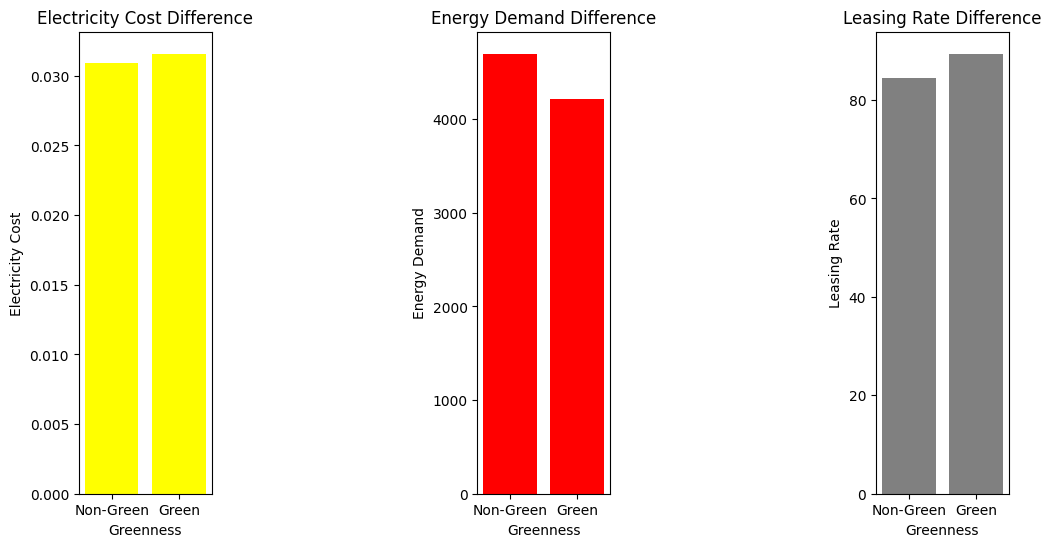

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=False,sharey=False,figsize=(12, 6))

ax1.bar(elec['green'], elec['Electricity_Costs'], color='yellow')
ax1.set_title('Electricity Cost Difference')
ax1.set_xlabel('Greenness')
ax1.set_ylabel('Electricity Cost')

ax2.bar(energy['green'], energy['total_dd_07'], color='red')
ax2.set_title('Energy Demand Difference')
ax2.set_xlabel('Greenness')
ax2.set_ylabel('Energy Demand')

ax3.bar(lr['green'], lr['leasing_rate'], color='grey')
ax3.set_title('Leasing Rate Difference')
ax3.set_xlabel('Greenness')
ax3.set_ylabel('Leasing Rate')

plt.subplots_adjust(wspace=2)

plt.show()

None of Electricity Cost, Energy Demand, or Leasing Rate actually has a large difference between green buildings and non-green ones. However, Size and Class A seem to have a larger correlation with greenness that worths accounting for.

In [ ]:
class_a = use_gb.groupby('green_rating')[['class_a']].mean()
class_a.reset_index(inplace=True)
class_a['green'] = class_a['green_rating'].apply(map_values)
size = use_gb.groupby('green_rating')[['size']].mean()
size.reset_index(inplace=True)
size['green'] = size['green_rating'].apply(map_values)

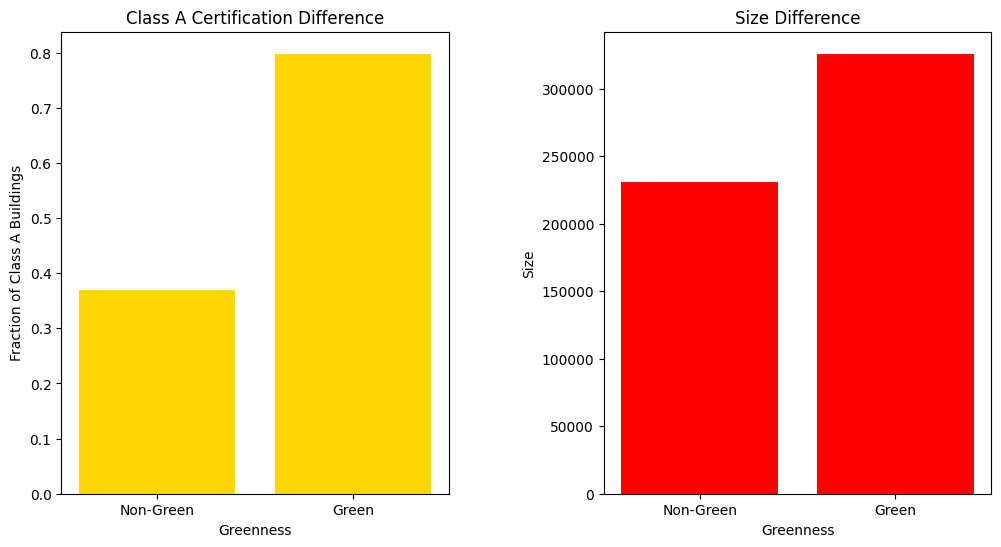

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False,sharey=False,figsize=(12, 6))

ax1.bar(class_a['green'], class_a['class_a'], color='gold')
ax1.set_title('Class A Certification Difference')
ax1.set_xlabel('Greenness')
ax1.set_ylabel('Fraction of Class A Buildings')

ax2.bar(size['green'], size['size'], color='red')
ax2.set_title('Size Difference')
ax2.set_xlabel('Greenness')
ax2.set_ylabel('Size')

plt.subplots_adjust(wspace=0.4)

plt.show()

Obviously, green buildings are twice likely to be a Class A building and about $\frac{1}{3}$ larger in size. Intuition drives us to adjust the rents against these two variables and compare the net rents of green and non-green buildings. We use a simple adjustment method here by defining a premium for Class A buildings and also for Large Size buildings, then take them out from all premium buildings.

In [ ]:
class_a_prem = use_gb[use_gb['class_a']==1]['Rent'].mean() / use_gb[use_gb['class_a']==0]['Rent'].mean() - 1
class_a_prem # the premium for Class A buildings

0.24498000996045266

In [ ]:
med_size = use_gb['size'].median()
use_gb['large'] = use_gb['size'] > med_size
size_prem = use_gb[use_gb['large']==1]['Rent'].mean() / use_gb[use_gb['large']==0]['Rent'].mean() - 1
size_prem # the premium for Large Size buildings

<ipython-input-48-3d9c391e90e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_gb['large'] = use_gb['size'] > med_size


0.13129068979799996

In [ ]:
def class_discount(value):
  return (1+class_a_prem) if value else 1
def size_discount(value):
  return (1+size_prem) if value else 1
use_gb['class_a_discount'] = use_gb['class_a'].apply(class_discount)
use_gb['size_discount'] = use_gb['large'].apply(size_discount)
use_gb['net_rent'] = use_gb['Rent'] / (use_gb['class_a_discount']*use_gb['size_discount'])
use_gb.dropna(how='any')

<ipython-input-52-b22d2679049b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_gb['class_a_discount'] = use_gb['class_a'].apply(class_discount)
<ipython-input-52-b22d2679049b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_gb['size_discount'] = use_gb['large'].apply(size_discount)
<ipython-input-52-b22d2679049b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

CS_PropertyID  cluster     size  empl_gr    Rent  leasing_rate  stories  \
0            379105        1   260300     2.22   38.56         91.39       14   
1            122151        1    67861     2.22   28.57         87.14        5   
2            379839        1   164848     2.22   33.31         88.94       13   
3             94614        1    93372     2.22   35.00         97.04       13   
4            379285        1   174307     2.22   40.69         96.58       16   
...             ...      ...      ...      ...     ...           ...      ...   
7889         157117     1230  1300000     1.15  137.51        100.00       41   
7890         158379     1230    16140     1.15  152.73         75.22        8   
7891          52316     1230    15726     1.15  158.92        100.00        6   
7892         158124     1230    51300     1.15  198.99        100.00       12   
7893         157086     1230  1876972     1.15  250.00         99.84       45   

      age  renovated  class_a  ...  hd_total07  total_dd_07  Precipitation  \
0      16          0        1  ...          58         5046          42.57   
1      27          0        0  ...          58         5046          42.57   
2      36          1        0  ...          58         5046          42.57   
3      46          1        0  ...          58         5046          42.57   
4       5          0        1  ...          58         5046          42.57   
...   ...        ...      ...  ...         ...          ...            ...   
7889   35          0        1  ...        4796         6095          48.35   
7890   90          1        0  ...        4796         6095          48.35   
7891   67          0        0  ...        4796         6095          48.35   
7892   91          0        0  ...        4796         6095          48.35   
7893   34          1        1  ...        4796         6095          48.35   

      Gas_Costs  Electricity_Costs  cluster_rent  large  class_a_discount  \
0      0.013700           0.029000         36.78   True           1.24498   
1      0.013731           0.029045         36.78  False           1.00000   
2      0.013731           0.029045         36.78   True           1.00000   
3      0.013731           0.029045         36.78  False           1.00000   
4      0.013731           0.029045         36.78   True           1.24498   
...         ...                ...           ...    ...               ...   
7889   0.011757           0.045457         58.72   True           1.24498   
7890   0.011757           0.045457         58.72  False           1.00000   
7891   0.011757           0.045457         58.72  False           1.00000   
7892   0.011757           0.045457         58.72  False           1.00000   
7893   0.011757           0.045457         58.72   True           1.24498   

      size_discount    net_rent  
0          1.131291   27.377919  
1          1.000000   28.570000  
2          1.131291   29.444245  
3          1.000000   35.000000  
4          1.131291   28.890237  
...             ...         ...  
7889       1.131291   97.633238  
7890       1.000000  152.730000  
7891       1.000000  158.920000  
7892       1.000000  198.990000  
7893       1.131291  177.502068  

[7606 rows x 27 columns]

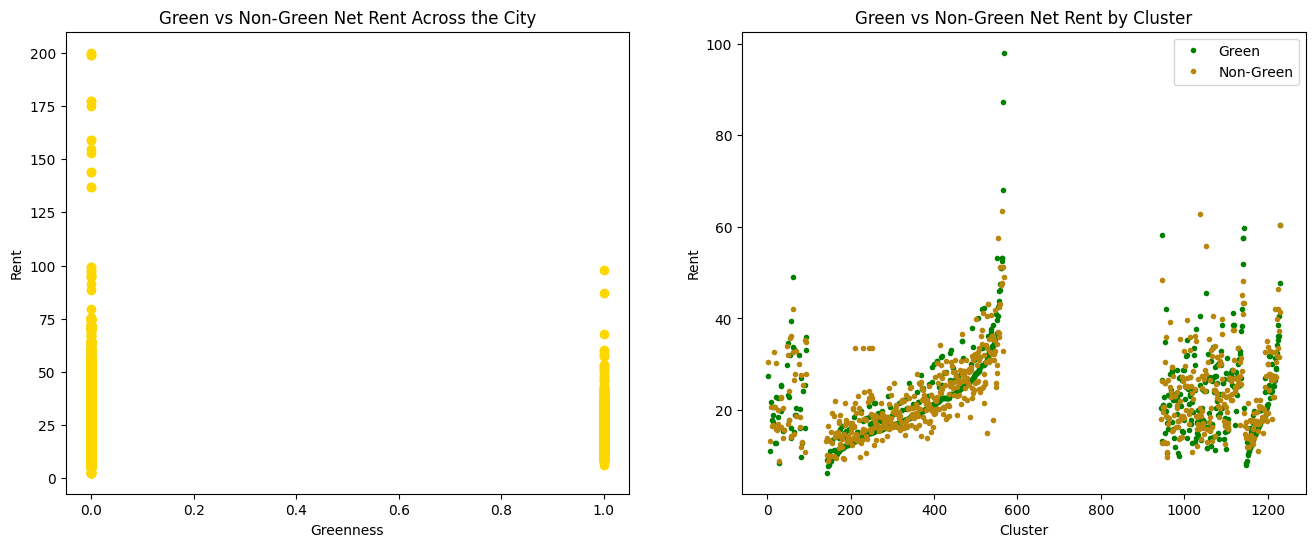

In [ ]:
net_by_cluster_green = use_gb[use_gb['green_rating']==1].groupby('cluster')[['net_rent']].mean()
net_by_cluster_notgreen = use_gb[use_gb['green_rating']==0].groupby('cluster')[['net_rent']].mean()
net_by_cluster_green.reset_index(inplace=True)
net_by_cluster_notgreen.reset_index(inplace=True)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False,sharey=False,figsize=(16, 6))

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.plot(use_gb['green_rating'], use_gb['net_rent'], marker='o', color='gold', linestyle='None')
ax1.set_title('Green vs Non-Green Net Rent Across the City')
ax1.set_xlabel('Greenness')
ax1.set_ylabel('Rent')

ax2.plot(net_by_cluster_green['cluster'], net_by_cluster_green['net_rent'], marker='o', color='green', markersize=3, linestyle='None', label='Green')
ax2.plot(net_by_cluster_notgreen['cluster'], net_by_cluster_notgreen['net_rent'], marker='o', color='darkgoldenrod', markersize=3, linestyle='None', label='Non-Green')
ax2.set_title('Green vs Non-Green Net Rent by Cluster')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Rent')
ax2.legend()

plt.subplots_adjust(wspace=0.2)

plt.show()

After the adjustment, we can see the rent for green and non-green buildings are actually closer. Especially if we compare the by cluster graph for clusters 200 to 600, we can see an obvious downward movement of the green ones from above the non-green ones to the middle. The last part of this analysis is to testify whether the 5% green certification is worth it or not.

In [ ]:
cluster_green = use_gb[use_gb['green_rating']==1].groupby('cluster')[['net_rent']].mean()
cluster_green.reset_index(inplace=True)
cluster_non_green = use_gb[use_gb['green_rating']==0].groupby('cluster')[['net_rent']].mean()
cluster_non_green.reset_index(inplace=True)
comp = cluster_green.merge(cluster_non_green, left_on = 'cluster', right_on = 'cluster', suffixes=['_green', '_non_green'])

In [ ]:
comp['worth'] = comp['net_rent_green'] > 1.05*comp['net_rent_non_green']
comp['worth'].mean()

0.3545994065281899

## Conclusion
On average, there is only 35% chance that a green building will recoup the 5% expense on certification. It is true that the rent premium is long-term, and in the end the certification expense will be paid back if green buildings truly enjoy a premium over non-green ones. However, the correlation between greenness and rent is unclear under current analysis. There could be other factors than building class or size that should be discounted from the nominal green premium, and the net effect greenness has on rent is therefore unresolved. So instead of a green building, a wiser and more promising plan is to pursue a Class A certification and building size maximization under current budget. Without more in-depth analysis, our current belief is that the payback period should be about 2-3 years longer than the stats guru's calculation to compensate for the unfully-occupied early years and overestimated leasing rate.

# Question 4 : Visual story telling part 2 - Capital Metro data

## The Rhythms of Campus Life: Unraveling Bus Ridership Patterns

The UT-Austin campus, a bustling hub of academic pursuits, innovative research, and vibrant student life has a pulse that can be felt and observed in many ways. One such reflection of the campus's rhythms is the ridership patterns of the Capital Metro bus network. As we delve into the data, spanning September to November, a vivid picture emerges.

In [ ]:
import pandas as pd
data = pd.read_csv('https://github.com/dpuelz/STA380/blob/master/data/capmetro_UT.csv?raw=true')
data.head()

timestamp  boarding  alighting day_of_week  temperature  \
0  2018-09-01 06:00:00         0          1         Sat        74.82   
1  2018-09-01 06:15:00         2          1         Sat        74.82   
2  2018-09-01 06:30:00         3          4         Sat        74.82   
3  2018-09-01 06:45:00         3          4         Sat        74.82   
4  2018-09-01 07:00:00         2          4         Sat        74.39   

   hour_of_day month  weekend  
0            6   Sep  weekend  
1            6   Sep  weekend  
2            6   Sep  weekend  
3            6   Sep  weekend  
4            7   Sep  weekend

### The Pulse of the Week:

From Monday to Friday, UT-Austin's campus was alive with activity. While weekdays were punctuated with the urgency of lectures, assignments, and research, weekends tell a different tale. Without the typical weekday hustle, boardings and alightings spread more evenly throughout the day. Whether it's for weekend classes, social events, or explorations beyond the campus, the rhythm is distinctly more relaxed. The relaxed cadence of Saturdays and Sundays, marked by a more even spread of boardings and alightings, hinted at leisurely pursuits, weekend classes, or perhaps off-campus explorations.








<ipython-input-8-f3ec8b4e9d82>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_data = data.groupby(['hour_of_day', 'weekend']).mean().reset_index()


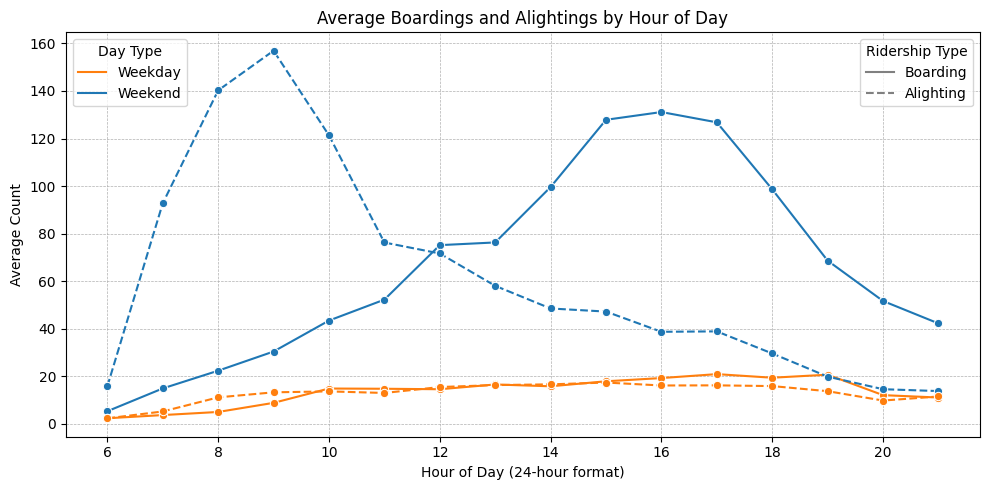

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
hourly_data = data.groupby(['hour_of_day', 'weekend']).mean().reset_index()

# Plot with corrected legends for day type and ridership type
plt.figure(figsize=(10, 5))

# Line plots for boarding and alighting
sns.lineplot(x='hour_of_day', y='boarding', hue='weekend', data=hourly_data, marker='o')
sns.lineplot(x='hour_of_day', y='alighting', hue='weekend', data=hourly_data, marker='o', linestyle='--')

# Title and labels
plt.title('Average Boardings and Alightings by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Average Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Handling legends
# First legend for day type
handles, labels = plt.gca().get_legend_handles_labels()
legend_daytype = plt.legend(handles=handles[1:3], labels=['Weekday', 'Weekend'], title='Day Type', loc='upper left')
plt.gca().add_artist(legend_daytype)

# Second legend for ridership type
lines_boarding_alighting = [plt.Line2D([0], [0], color='gray', linestyle='-'),
                            plt.Line2D([0], [0], color='gray', linestyle='--')]
labels_boarding_alighting = ['Boarding', 'Alighting']
plt.legend(handles=lines_boarding_alighting, labels=labels_boarding_alighting, title='Ridership Type', loc='upper right')

plt.tight_layout()
plt.show()

###The Hourly Dance:

Delving deeper into the daily rhythm, each hour unraveled a story. Each weekday morning, as the first lectures began, buses delivered a surge of students and staff to the campus. The significant peak in alightings around 9 AM suggests many rely on this service to reach the university, ready to embark on their academic and professional pursuits.

As the day progresses, another pattern emerges: a pronounced peak in boardings around 4 PM. This indicates that after a day of studies, research, or work, many turn to the buses once more, perhaps heading back to their homes or other engagements.

Interestingly, the morning hours see a relatively low number of boardings within the campus, hinting that those who reside on-campus might prefer other means – walking, biking, or scooters – to reach their destinations. Their closeness to the heart of university life affords them this flexibility.

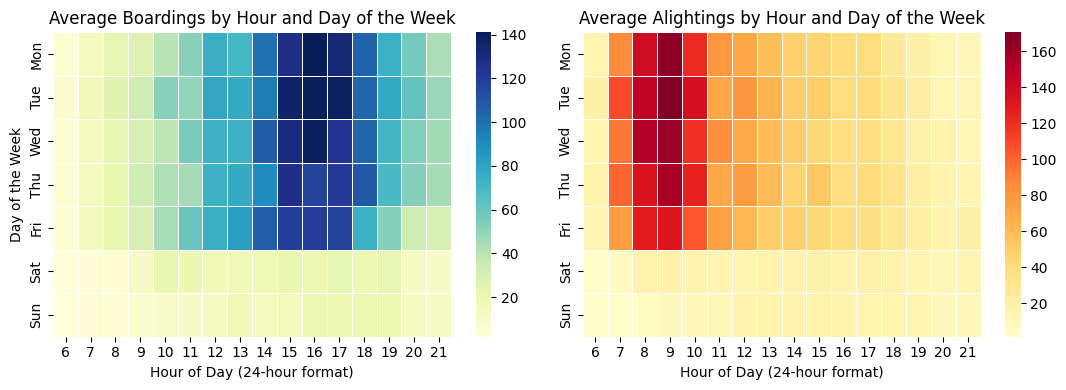

In [ ]:
order_of_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Group data by hour_of_day and day_of_week to calculate the average boarding and alighting
hourly_data_corrected = data.groupby(['hour_of_day', 'day_of_week'])[['boarding', 'alighting']].mean().reset_index()

# Extracting the heatmap data for boardings and alightings
heatmap_boarding_data_corrected = hourly_data_corrected.pivot_table(values='boarding', index='day_of_week', columns='hour_of_day')
heatmap_alighting_data_corrected = hourly_data_corrected.pivot_table(values='alighting', index='day_of_week', columns='hour_of_day')

# Plotting the heatmaps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

# Corrected heatmap for boardings
sns.heatmap(heatmap_boarding_data_corrected.loc[order_of_days], cmap="YlGnBu", linewidths=.5, ax=ax1)
ax1.set_title('Average Boardings by Hour and Day of the Week')
ax1.set_xlabel('Hour of Day (24-hour format)')
ax1.set_ylabel('Day of the Week')

# Corrected heatmap for alightings
sns.heatmap(heatmap_alighting_data_corrected.loc[order_of_days], cmap="YlOrRd", linewidths=.5, ax=ax2)
ax2.set_title('Average Alightings by Hour and Day of the Week')
ax2.set_xlabel('Hour of Day (24-hour format)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

###The Ebb and Flow of Months:

As the calendar pages flipped from September to November, the rhythms on the UT-Austin buses subtly transformed. September, bathed in the fresh promise of a new semester, saw buses bustling with riders. But as October eased in, followed by November, the patterns ebbed and flowed. Midterms, project deadlines, and the whisper of upcoming holidays played their part. Yet, amidst these shifts, a few constants stood out. The weekday surge around 9 AM remained, a testament to early risers heading to classes. Weekends, in contrast, had a more leisurely cadence. Each month, in its own way, painted a portrait of life at UT-Austin, shaped by academia, events, and the gentle tug of seasons.

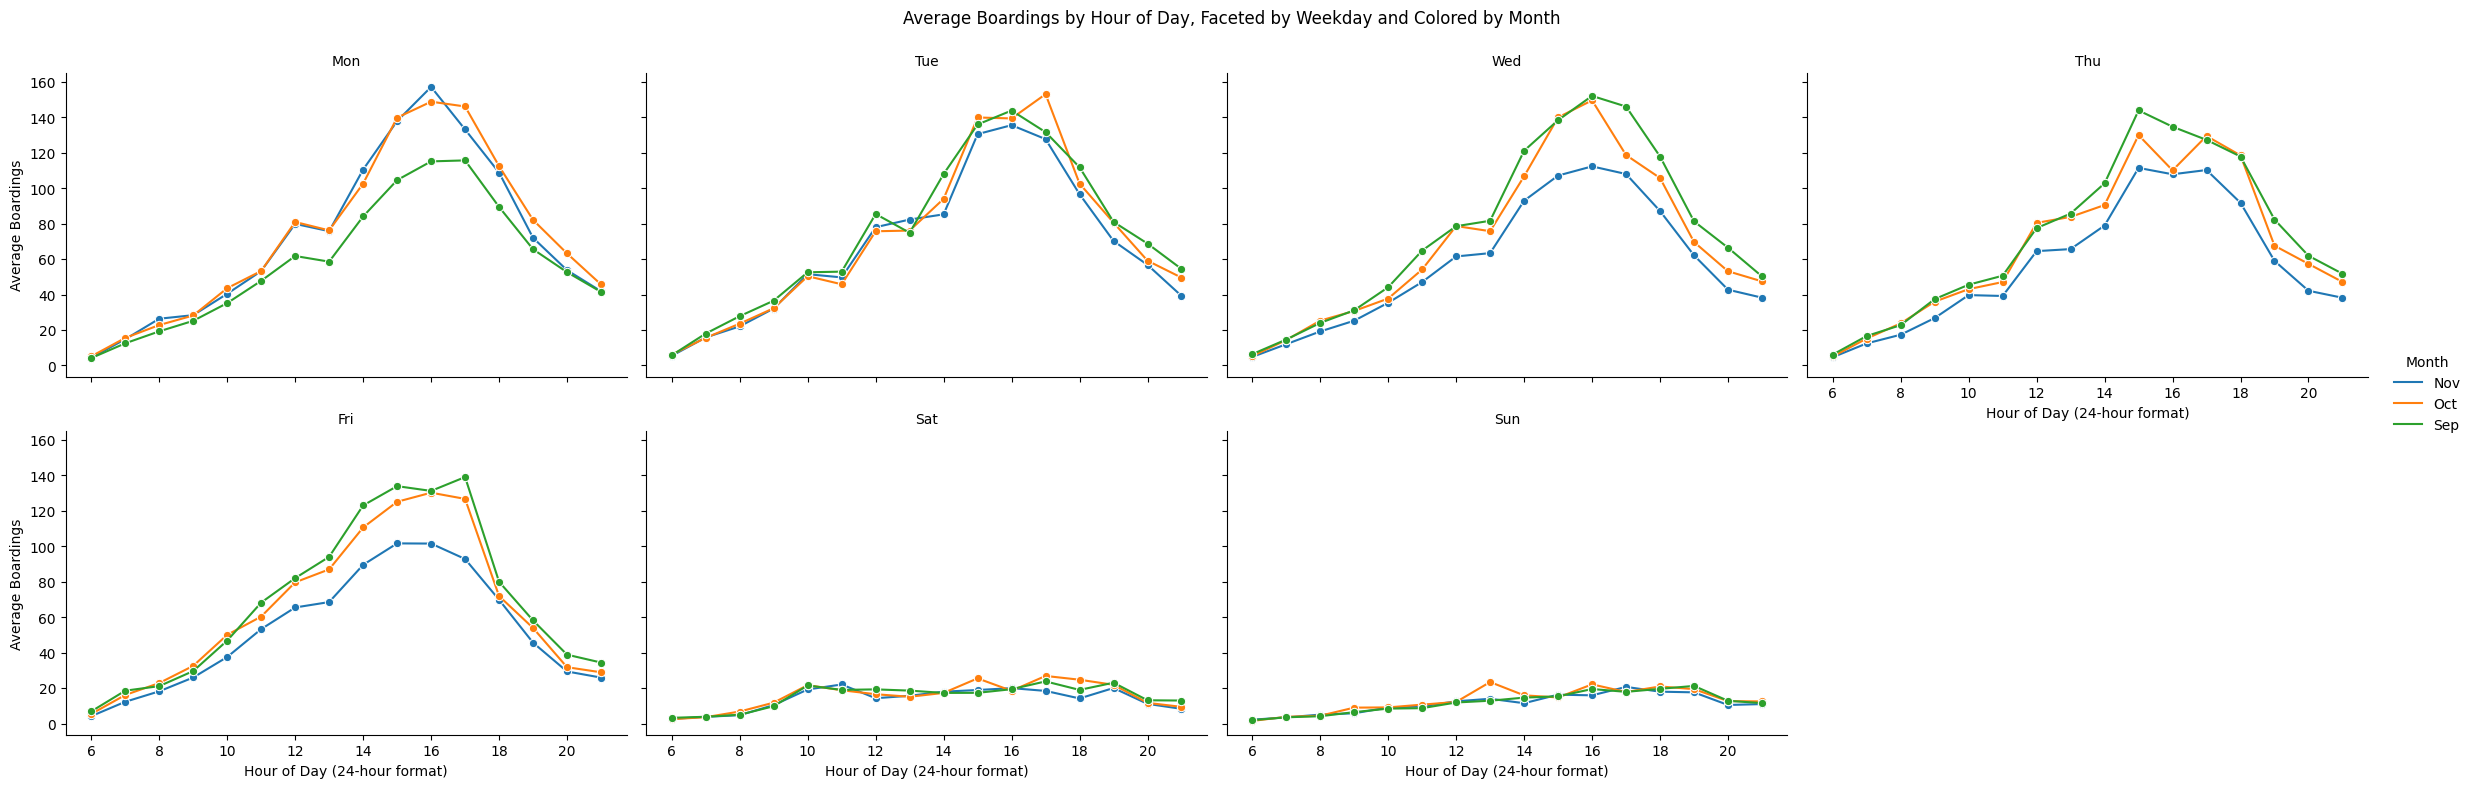

In [ ]:
# Group data by hour_of_day, day_of_week, month and calculate the average boarding
hourly_monthly_data = data.groupby(['hour_of_day', 'day_of_week', 'month'])['boarding'].mean().reset_index()

# Create the faceted line graph
g = sns.FacetGrid(hourly_monthly_data, col="day_of_week", col_order=order_of_days, col_wrap=4, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x="hour_of_day", y="boarding", hue="month", palette="tab10", marker='o')
g.set_axis_labels("Hour of Day (24-hour format)", "Average Boardings")
g.set_titles("{col_name}")
g.add_legend(title="Month")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Boardings by Hour of Day, Faceted by Weekday and Colored by Month')

plt.show()

###A Chill in the air:

As autumn settled over UT-Austin and temperatures dipped, one wondered: Do cooler days sway bus-riding decisions? Delving into the data reveals a relationship: chilly mornings might see more students boarding buses than walking. However, temperature alone doesn't dictate this pattern; time of day significantly influences it.

The Capital Metro buses' patterns are multifaceted. Boardings vary across temperatures, but specific ranges attract more riders. The interplay of temperature with different hours, highlighted by vibrant markers, suggests dynamic preferences. Perhaps early hours see students avoiding the cold, while mid-day warmth encourages walking. In this dance of daily choices, temperature subtly influences UT-Austin's commuting rhythms.

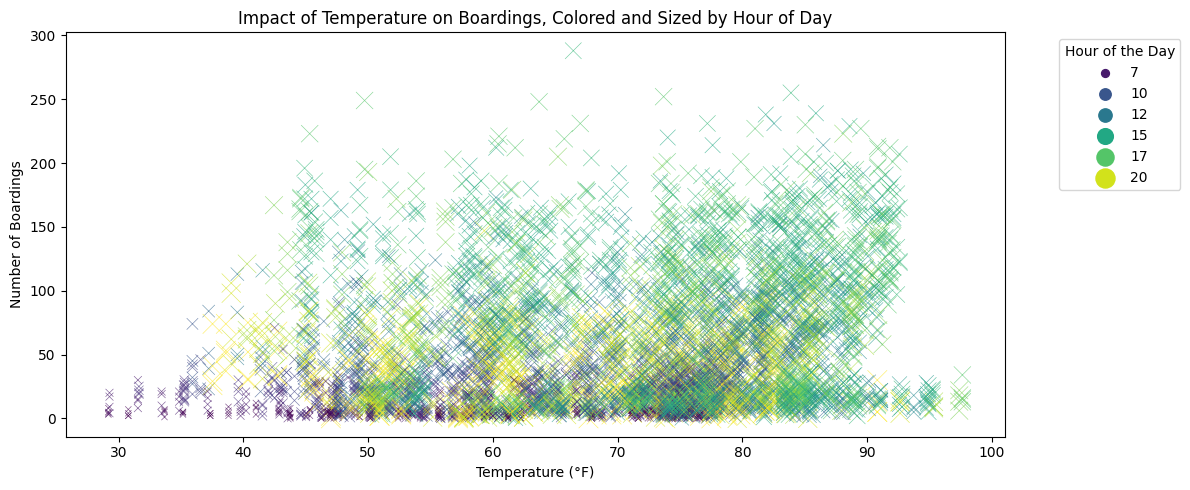

In [ ]:
# Scatter plot of temperature against average boardings, colored by hour of the day
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data, x='temperature', y='boarding', hue='hour_of_day', palette="viridis",
                size='hour_of_day', sizes=(20, 200), alpha=0.7, marker='x')
plt.title('Impact of Temperature on Boardings, Colored and Sized by Hour of Day')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Boardings')
plt.legend(title="Hour of the Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Question 5: Clustering and dimensionality reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
df = pd.read_csv('https://github.com/dpuelz/STA380/blob/master/data/wine.csv?raw=true')
df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [3]:
# Extract features as X
X = df.drop(['quality', 'color'], axis=1)
X

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
6492     11.2  
6493      9.6  
6494      9.4  
6495     12.8  
6496     11.8  

[6497 rows x 11 columns]

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

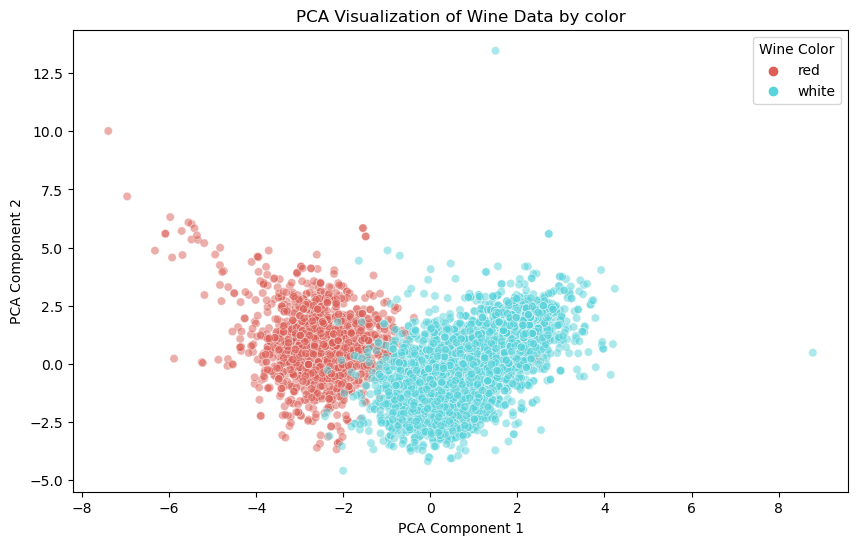

In [6]:
# Create a scatter plot of PCA results by 'color'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['color'], palette=sns.color_palette('hls', 2), alpha=0.5)
plt.title('PCA Visualization of Wine Data by color')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Wine Color')
plt.show()

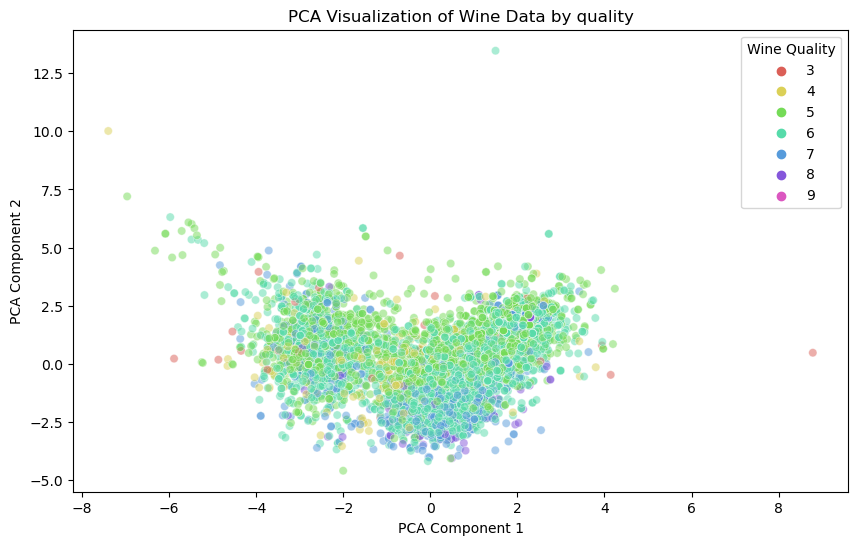

In [7]:
# Create a scatter plot of PCA results by 'quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['quality'], palette=sns.color_palette('hls', 7), alpha=0.5)
plt.title('PCA Visualization of Wine Data by quality')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Wine Quality')
plt.show()

In [8]:
# Perform tSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X_scaled)

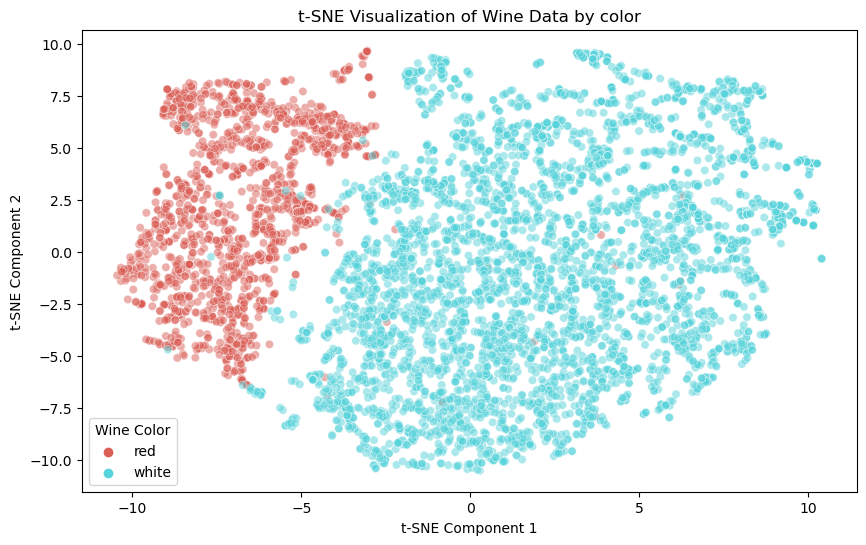

In [9]:
# Create a scatter plot of tSNE results by 'color'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['color'], palette=sns.color_palette('hls', 2), alpha=0.5)
plt.title('t-SNE Visualization of Wine Data by color')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Wine Color')
plt.show()

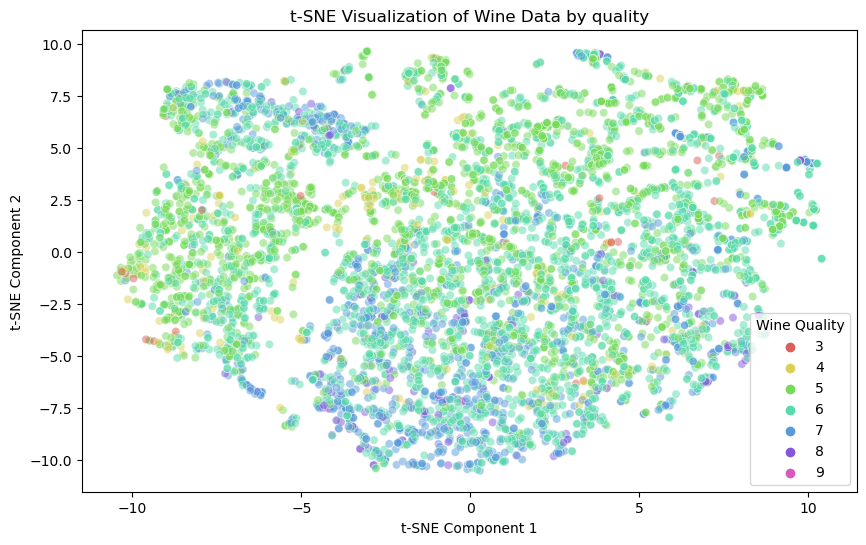

In [10]:
# Create a scatter plot of tSNE results by 'quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['quality'], palette=sns.color_palette('hls', 7), alpha=0.5)
plt.title('t-SNE Visualization of Wine Data by quality')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Wine Quality')
plt.show()

In [11]:
# Perform Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, fit_inverse_transform=True)
kernel_pca_result = kernel_pca.fit_transform(X_scaled)

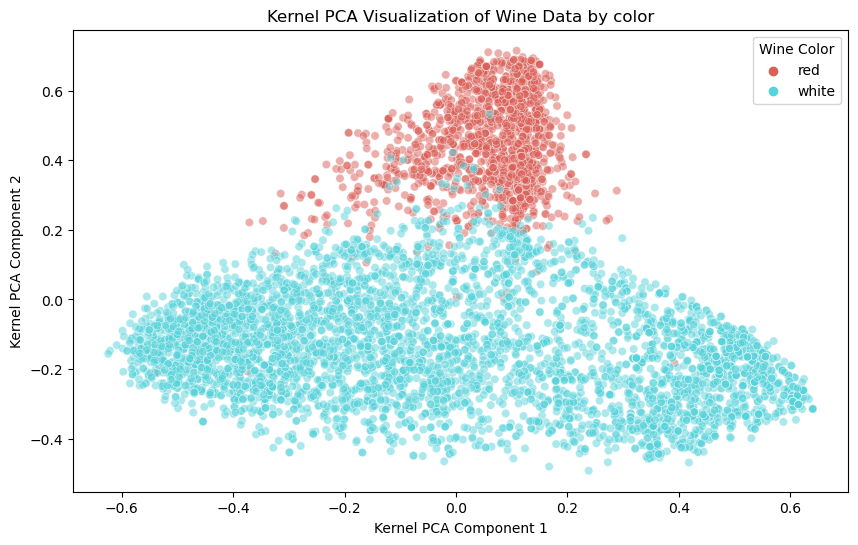

In [12]:
# Create a scatter plot of Kernel PCA results by 'color'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=kernel_pca_result[:, 0], y=kernel_pca_result[:, 1], hue=df['color'], palette=sns.color_palette('hls', 2), alpha=0.5)
plt.title('Kernel PCA Visualization of Wine Data by color')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.legend(title='Wine Color')
plt.show()

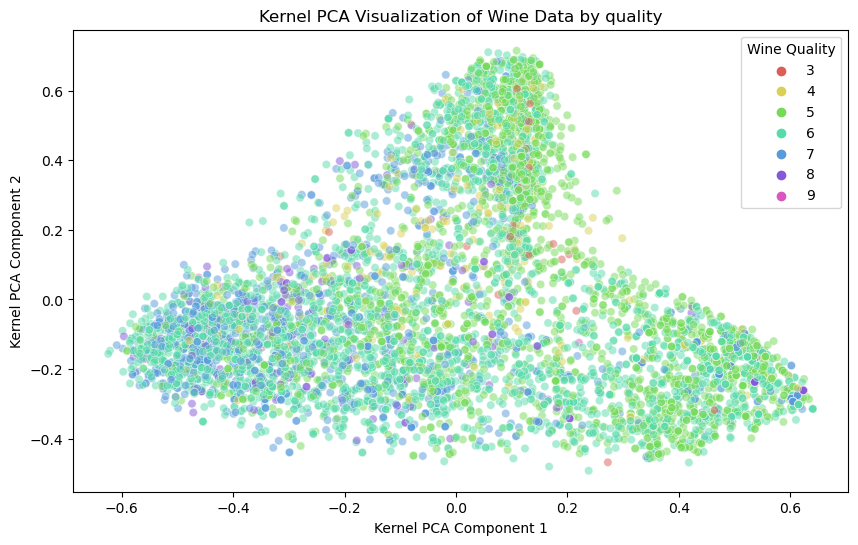

In [13]:
# Create a scatter plot of Kernel PCA results by 'quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=kernel_pca_result[:, 0], y=kernel_pca_result[:, 1], hue=df['quality'], palette=sns.color_palette('hls', 7), alpha=0.5)
plt.title('Kernel PCA Visualization of Wine Data by quality')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.legend(title='Wine Quality')
plt.show()

Based on the scatter plots generated using PCA, t-SNE, and Kernel PCA with 2 components each, we have analyzed the results to determine which dimensionality reduction technique makes the most sense for this data. Each technique has its own strengths and limitations, and the choice depends on the specific characteristics and goals of the data analysis.

From the scatter plots:
*   For 'color': PCA is the best
*   For 'quality': t-SNE and Kernel PCA are better

In conclusion, the most suitable dimensionality reduction technique for this data depends on the nature of the data and the goals of analysis. If the data exhibits clear linear relationships, PCA might be appropriate, and 'color' is the case. If the data has complex nonlinear structures, t-SNE or Kernel PCA might provide better insights, and 'quality' is the case.

# Question 6: Market segmentation

## Objective

To understand the social-media audience of NutrientH20 better by identifying interesting market segments.

## Data Pre-processing

The data was first normalized since the scales of the number of posts in each category varied widely.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
post = pd.read_csv("https://github.com/dpuelz/STA380/blob/master/data/social_marketing.csv?raw=True")
# Removing non-numeric columns
data_numeric = post.select_dtypes(exclude=['object'])

# Scaling the numeric data
data_scaled = scaler.fit_transform(data_numeric)

# Re-running the clustering
clusters = kmeans.fit_predict(data_scaled)

## Methodology

Two primary methods were employed:
- **K-means Clustering**: To group users based on their overall behavior.
- **Latent Factor Analysis (SVD)**: To unearth underlying structures and patterns in the data.

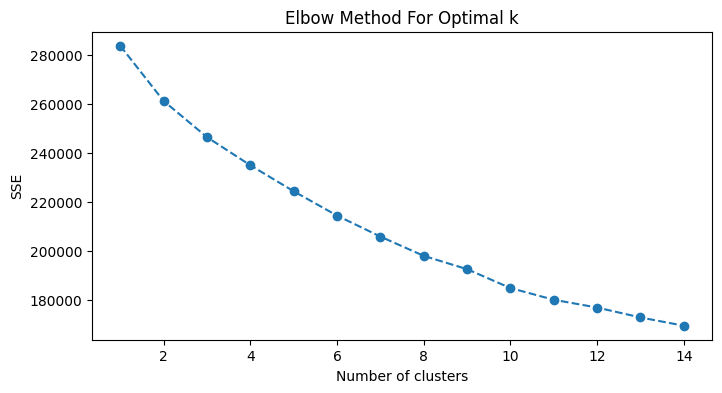

In [ ]:
# K-means Clustering
# Determining the optimal number of clusters using the Elbow method
sse = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the results to determine the "elbow"
plt.figure(figsize=(8, 4))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

**Determination of Number of Clusters (k)**

Using the Elbow method, we plotted the sum of squared errors (SSE) for different values of k. The "elbow" of the plot, where the rate of decrease of SSE slows down, indicates an optimal value for k.

From our analysis, this elbow was observed between k=4 and k=6. Since we are planning to follow up with latent factor analysis, we choose k = 5, which is a moderate number of clusters to start with, and the latent factors will further refine and deepen our understanding without making the insights overwhelmingly complex.

In [ ]:
# Performing K-means clustering with k = 5
kmeans= KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters= kmeans.fit_predict(data_scaled)

# Adding the cluster labels back to the original data
data_numeric['Cluster'] = clusters

# Calculating the mean values for each cluster again
cluster_means = data_numeric.groupby('Cluster').mean()

# Extracting top interests for each cluster again
top_interests_per_cluster_analysis = {}
for cluster in cluster_means.index:
    top_interests = cluster_means.loc[cluster].sort_values(ascending=False).head(5)
    top_interests_per_cluster_analysis[f'Cluster {cluster}'] = top_interests

top_interests_per_cluster_analysis

{'Cluster 0': chatter          6.944366
 photo_sharing    5.541549
 cooking          4.995070
 college_uni      3.256338
 fashion          2.769014
 Name: 0, dtype: float64,
 'Cluster 1': sports_fandom    6.018919
 religion         5.413514
 food             4.628378
 parenting        4.136486
 chatter          4.090541
 Name: 1, dtype: float64,
 'Cluster 2': health_nutrition    12.237986
 personal_fitness     6.545767
 chatter              4.107551
 cooking              3.470252
 outdoors             2.790618
 Name: 2, dtype: float64,
 'Cluster 3': chatter             3.653257
 photo_sharing       1.840278
 current_events      1.361830
 college_uni         1.094828
 health_nutrition    1.084052
 Name: 3, dtype: float64,
 'Cluster 4': politics     9.147321
 travel       5.799107
 news         5.267857
 chatter      4.370536
 computers    2.575893
 Name: 4, dtype: float64}

/Users/sam/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


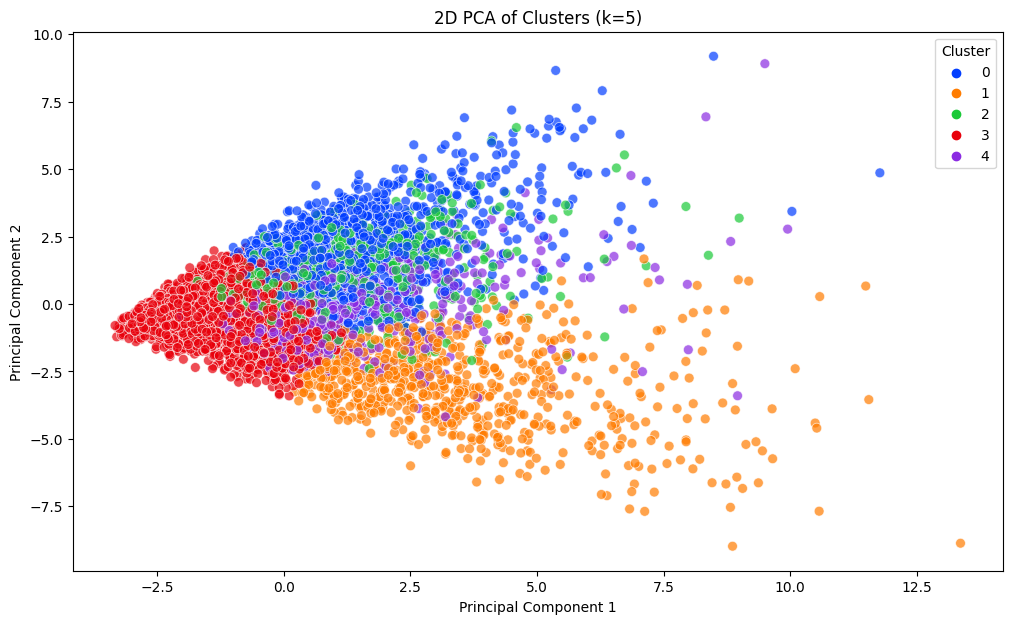

In [ ]:
# Using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualizing the clusters using a 2D PCA plot
plt.figure(figsize=(12, 7))
sns.scatterplot(data_pca[:, 0], data_pca[:, 1], hue=clusters, palette="bright", s=50, alpha=0.7)
plt.title('2D PCA of Clusters (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

From the plot, we can observe:

- The clusters are fairly well-separated in this 2D space, indicating distinct patterns of interests among different user groups.

- Some overlap exists between the clusters, suggesting that there might be commonalities or shared interests among some of the users across different clusters.

**Here's a detailed analysis of the characteristics of each cluster based on their top interests**:

**Cluster 0**:General Social Interactions & Lifestyle

**Main Interests**:  "Chatter", "Photo Sharing", "Cooking", "College/University", "Fashion"\
**Description**: This group appears to be comprised mainly of individuals engaged in everyday conversations ("chatter") and social interactions, often sharing photos. Their interests also lean towards lifestyle elements like cooking and fashion, and there's a significant presence of college or university-related content, suggesting a younger demographic, possibly students.

**Cluster 1**:Family & Tradition

**Main Interests**: "Sports Fandom", "Religion", "Food", "Parenting", "Chatter"\
**Description**: This group seems to be more family-oriented and traditional. The interests in sports fandom and religion suggest a mix of leisure activities and traditional values. The prominence of food and parenting topics further reinforces the family-centric nature of this group.

**Cluster 2**:Health & Outdoor Enthusiasts

**Main Interests**: "Health Nutrition", "Personal Fitness", "Chatter", "Cooking", "Outdoors"\
**Description**: Individuals in this cluster are health-conscious and likely to be fitness enthusiasts. Their discussions revolve around nutrition, personal fitness routines, and outdoor activities. They might be interested in healthy recipes, given the interest in cooking. This is the cluster to target for health and fitness campaigns.

**Cluster 3**:Casual Social Interactions

**Main Interests**: "Chatter", "Photo Sharing", "Current Events", "College/University", "Health Nutrition"\
**Description**: This seems to be a more general cluster with users engaged in typical social interactions and sharing photos. They also show interest in current events, suggesting they like to stay updated with news. The presence of college/university-related content and health nutrition suggests a mix of younger individuals and those conscious about their health.

**Cluster 4**:Informed & Tech-savvy

**Main Interests**:  "Politics", "Travel", "News", "Chatter", "Computers"\
**Description**: This cluster consists of individuals who are well-informed and likely tech-savvy. Their interests in politics and news indicate they are keen on staying updated with global events. The emphasis on travel suggests they might be explorers or business travelers. Their discussions around computers hint at a possible inclination towards technology or IT.

/Users/sam/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sam/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


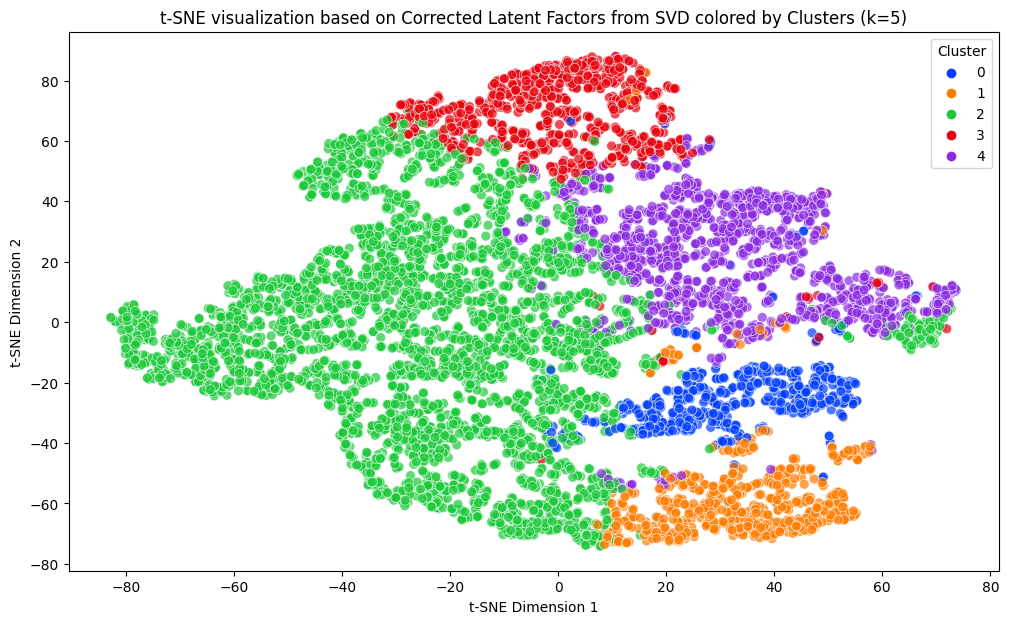

chatter  current_events    travel  photo_sharing  uncategorized   tv_film  \
0  0.126000        0.097218  0.116648       0.180282       0.094427  0.097464   
1  0.197162        0.064153  0.039950       0.303056       0.146529  0.079328   
2  0.074912        0.051916  0.424253      -0.010679      -0.030560  0.086300   
3 -0.112751       -0.029737  0.145494      -0.151487      -0.019023 -0.089950   
4 -0.194080       -0.057253 -0.007918      -0.230115       0.060533  0.210029   

   sports_fandom  politics      food    family  ...  religion    beauty  \
0       0.287732  0.130267  0.296909  0.244277  ...  0.297098  0.201518   
1      -0.316927  0.013936 -0.237815 -0.196236  ... -0.316139  0.208614   
2      -0.052024  0.489900 -0.111465 -0.049112  ... -0.093176 -0.150735   
3      -0.057338  0.196742  0.073275 -0.072377  ... -0.066615 -0.146953   
4      -0.032539 -0.058181  0.066155 -0.012170  ... -0.021335 -0.185752   

   parenting    dating    school  personal_fitness   fashion  small_business  \
0   0.294003  0.105170  0.280645          0.137505  0.183883        0.119051   
1  -0.295079  0.071466 -0.197612          0.144602  0.279798        0.094058   
2  -0.089174  0.031539 -0.081492         -0.217334 -0.138786        0.101008   
3  -0.047429  0.028287 -0.085734          0.444522 -0.138034       -0.077610   
4  -0.041360 -0.012056 -0.090362          0.156200 -0.171132        0.032037   

       spam     adult  
0  0.011472  0.026725  
1 -0.004570 -0.006941  
2  0.012407 -0.002773  
3  0.020922  0.023370  
4  0.020545  0.011701  

[5 rows x 36 columns]

In [ ]:
# Latent Factor Analysis using TruncatedSVD
svd = TruncatedSVD(n_components=5, random_state=42)
data_svd = svd.fit_transform(data_scaled)

# Clustering with k=5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
clusters_svd_5_corrected = kmeans_5.fit_predict(data_svd)

# Applying t-SNE on the latent factors derived from SVD
tsne = TSNE(n_components=2, random_state=42)
data_tsne_latent = tsne.fit_transform(data_svd)

# Visualization: t-SNE scatter plot colored by cluster labels, based on latent factors from SVD
plt.figure(figsize=(12, 7))
sns.scatterplot(data_tsne_latent[:, 0], data_tsne_latent[:, 1], hue=clusters_svd_5_corrected, palette="bright", s=50, alpha=0.7)
plt.title('t-SNE visualization based on Corrected Latent Factors from SVD colored by Clusters (k=5)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

latent_factors_svd

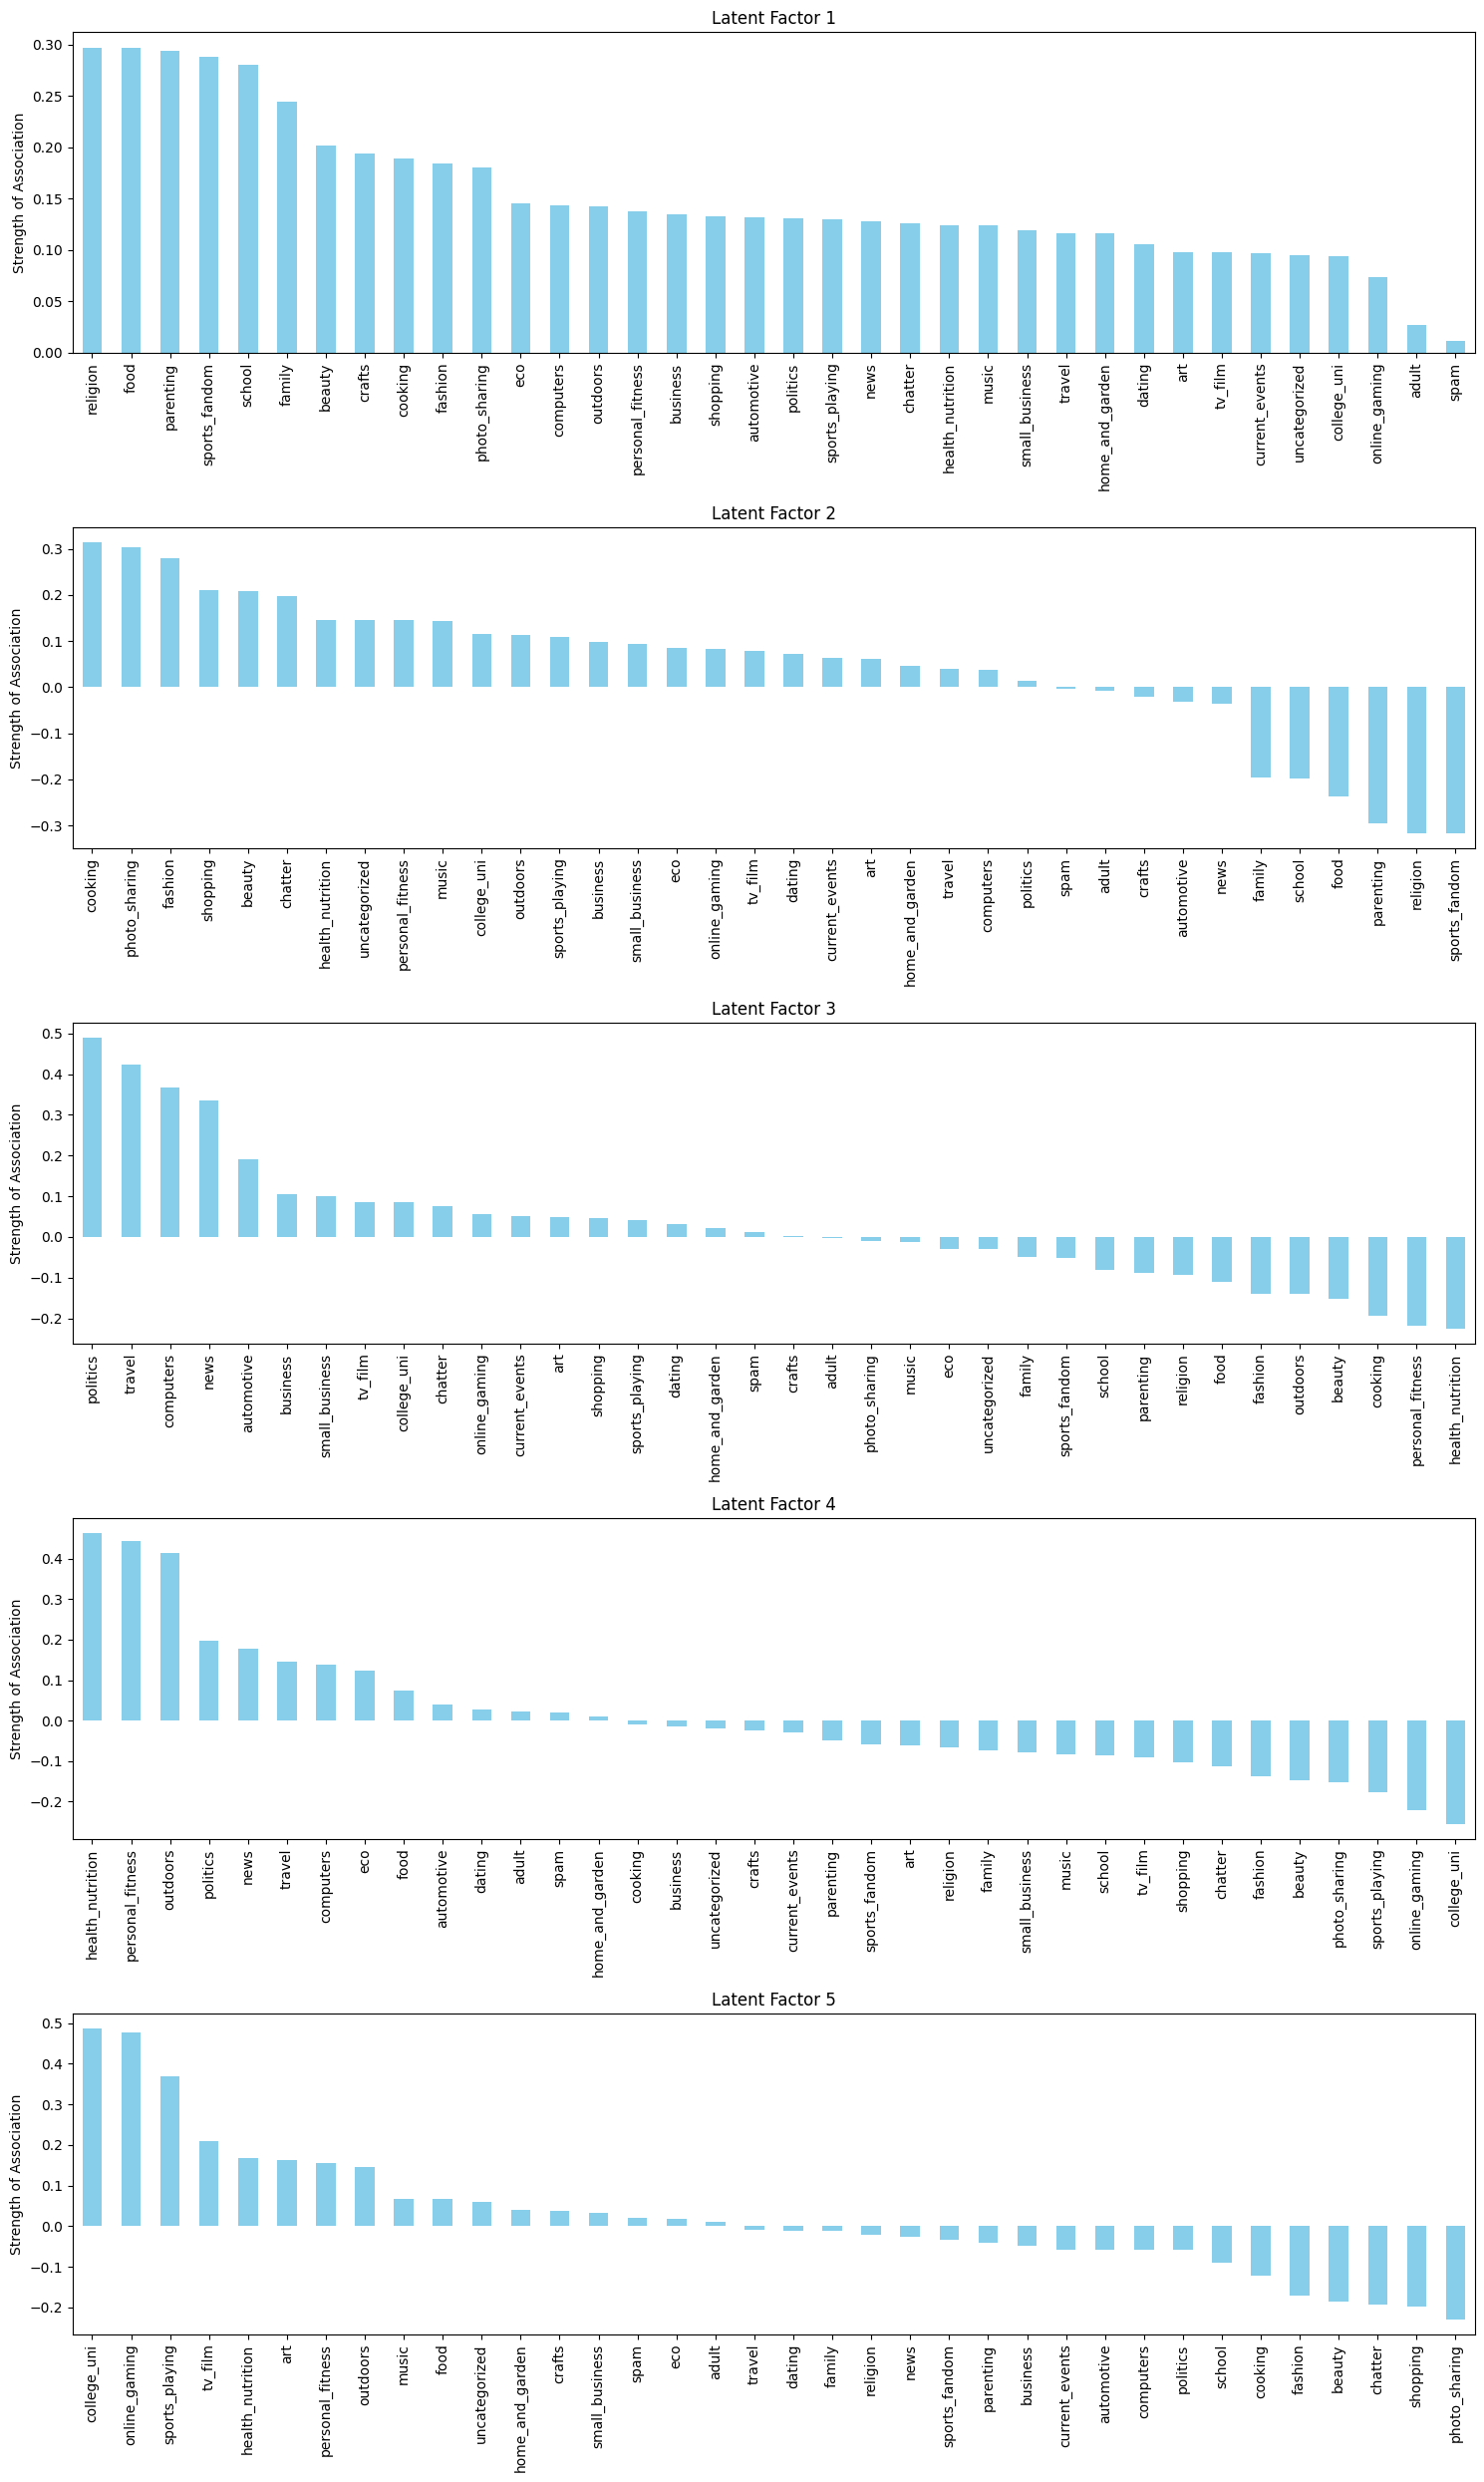

In [ ]:
# Bar chart visualization for latent factors
fig, axes = plt.subplots(5, 1, figsize=(15, 25))

for i in range(5):
    latent_factors_svd.iloc[i].sort_values(ascending=False).plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f"Latent Factor {i+1}")
    axes[i].set_ylabel("Strength of Association")

plt.tight_layout()
plt.show()


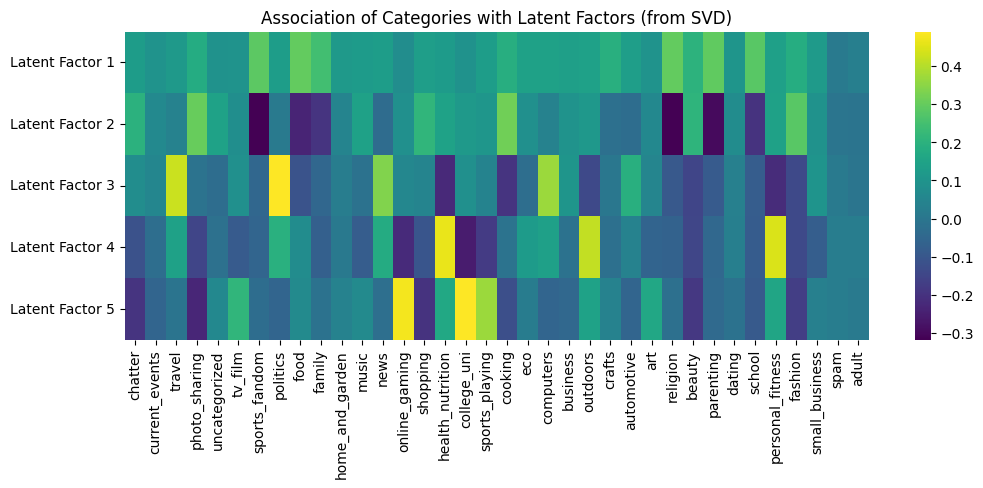

In [ ]:
# Visualization: Heatmap for Latent Factors (from SVD)
plt.figure(figsize=(12, 4))
sns.heatmap(latent_factors_svd, cmap="viridis", yticklabels=[f"Latent Factor {i+1}" for i in range(5)])
plt.title('Association of Categories with Latent Factors (from SVD)')
plt.show()

**Insights from the Latent Factor Analysis**:
- The latent factor analysis provides depth, revealing nuanced interests within the audience. For example, while several segments might engage in "Chatter," the associated topics vary, offering opportunities for more personalized content.

- The latent factors capture more nuanced interests that might not be immediately evident from clustering alone. For example, the strong associations between "Sports Fandom," "Religion," "Food," and "Family" in Latent Factor 1 capture a blend of leisure and traditional values, similar to Cluster 1.

- Latent Factor 2, emphasizing "Chatter," "Photo Sharing," and "Fashion," aligns closely with Cluster 0, reinforcing the idea of a younger, socially active demographic.

- The health and fitness orientation evident in Latent Factor 4 mirrors the interests of Cluster 2, emphasizing the significance of this segment in NutrientH20's audience.

- The presence of categories like "Politics," "Travel," and "Computers" in the latent factors suggests that there's an informed and tech-savvy segment within the audience, similar to Cluster 4.

# Question 7: The Reuters corpus

Can we uncover distinct writing styles among the authors in the Reuters C50 text corpus?

## Approach

**1.Preprocessing & Exploratory Data Analysis:** We load the text data from the C50train directory, containing articles from 50 different authors. A custom tokenizer/preprocessor (preprocess_text) is implemented to process the text data, including tokenization and specific preprocessing steps. Basic statistics and graphs help us understand the dataset.

In [25]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
from nltk.stem import PorterStemmer
nltk.download('punkt') # for tokenizing
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("STA380/data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("STA380/data/ReutersC50/C50test")


In [ ]:
# Helper function to tokenize, remove punctuation, and stem
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return stemmed_tokens


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [ ]:
# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")


Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2568 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words


In [ ]:
# Term Frequencies
all_tokens_train = [token for text in train_texts for token in preprocess_text(text)]
common_tokens_train = Counter(all_tokens_train).most_common(10)
print("\nMost common words across the training set:")
for token, freq in common_tokens_train:
    print(f"{token}: {freq}")

all_tokens_test = [token for text in test_texts for token in preprocess_text(text)]
common_tokens_test = Counter(all_tokens_test).most_common(10)
print("\nMost common words across the test set:")
for token, freq in common_tokens_test:
    print(f"{token}: {freq}")


Most common words across the training set:
said: 19856
's: 14872
'': 13882
``: 13712
year: 6146
compani: 5651
would: 5237
percent: 5211
million: 4942
market: 4629

Most common words across the test set:
said: 20126
's: 15319
'': 14301
``: 14262
year: 5971
percent: 5551
compani: 5346
would: 5113
million: 5062
market: 4567


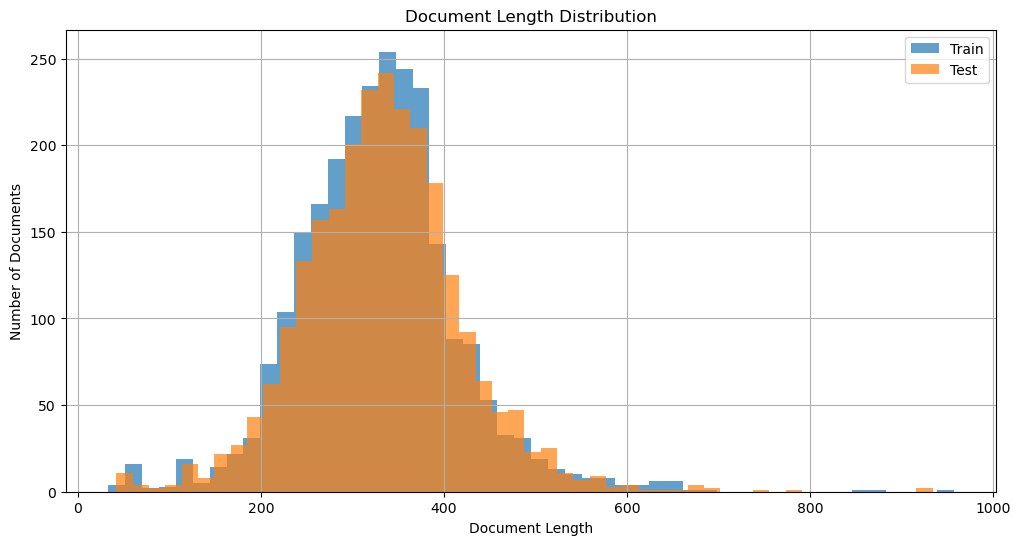

In [ ]:
# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

**2.TF-IDF Vectorization:** : We use the TF-IDF (Term Frequency-Inverse Document Frequency) technique to vectorize the text, representing each document as a vector of word frequencies.

In [ ]:
# The TfidfVectorizer will now use my custom tokenizer/preprocesser
vectorizer = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 

**3.PCA and t-SNE:** Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) are applied to reduce the dimensionality of the TF-IDF vectors and identify crucial components.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random

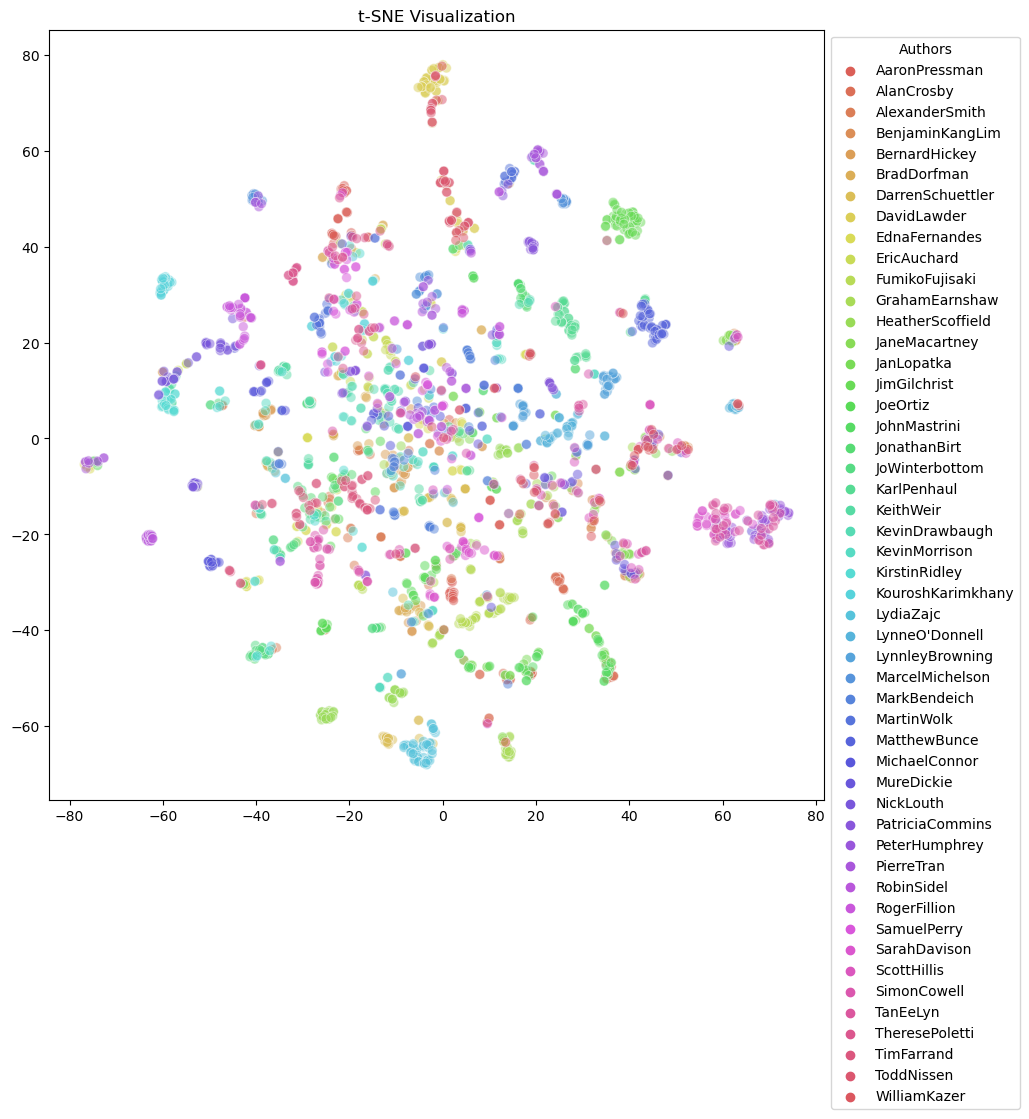

In [ ]:
# 1. Choose all authors
unique_authors = list(set(train_labels))

# 2. PCA and then t-SNE
pca = PCA(n_components=100)
reduced_data_pca = pca.fit_transform(train_dtm.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20, random_state=1)
tsne_results = tsne.fit_transform(reduced_data_pca)

# 3. Plotting
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=train_labels,
    palette=sns.color_palette("hls", len(unique_authors)),
    alpha=0.5,
    s=50
)
plt.title('t-SNE Visualization')
plt.legend(title='Authors', bbox_to_anchor=(1, 1), loc='best')
plt.show()

It seems like there are at least 5 clusters i.e. 5 kinds of writing styles among these 50 authors.

**4.K-means Clustering:**

**(1)** We employ K-means clustering to group authors based on writing styles. The elbow method helps determine the optimal number of clusters (K). We calculate inertia for different K values (up to 20) and plot the results.

In [ ]:
from sklearn.cluster import KMeans

C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

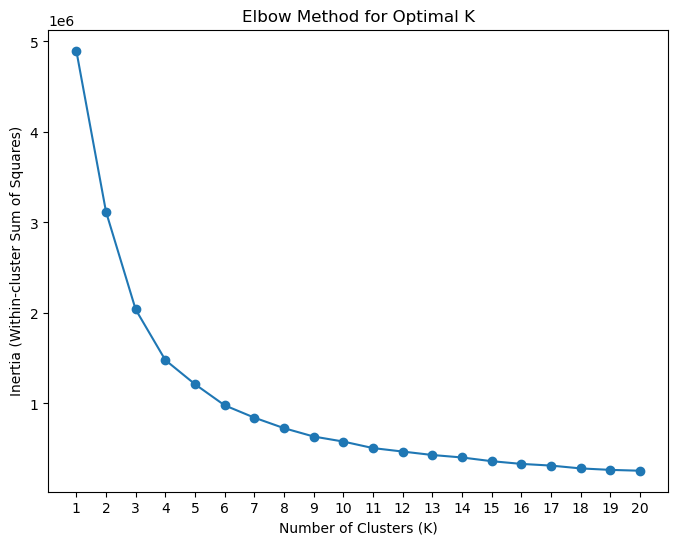

In [ ]:
# Helper function to find the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_k):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)  # Convert inertia to integer
    return inertias

# K-means clustering using the elbow method
max_clusters = 20  # Maximum number of clusters to consider
inertias = find_optimal_clusters(tsne_results, max_clusters)

# Plotting the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters+1), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')

# Label every x-axis tick with the corresponding K value
plt.xticks(range(1, max_clusters+1))

plt.show()

The elbow point indicates that K=6 is the most suitable, implying around 6 distinct writing styles among the 50 authors.

**(2)** This code snippet performs K-means clustering with 6 clusters (K=6) on the reduced t-SNE results, adds the cluster labels to the t-SNE data, and then visualizes the t-SNE results with different clusters represented by distinct colors.

C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jran0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


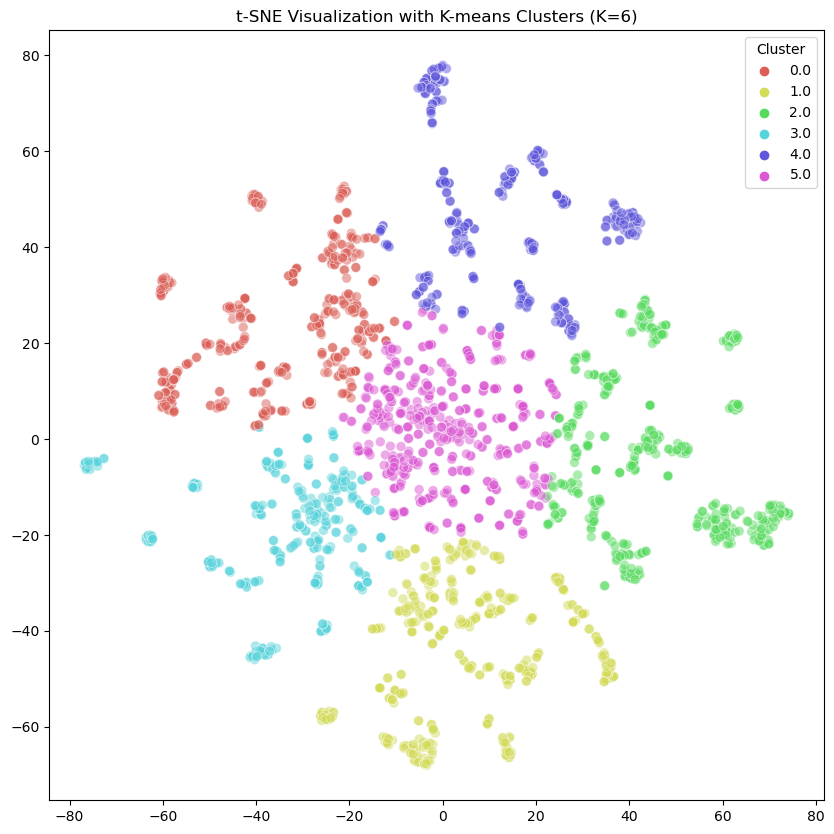

In [ ]:
# K-means clustering with K=6
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(tsne_results)

# Adding cluster labels to the t-SNE results
tsne_results_with_clusters = tsne_results.copy()
tsne_results_with_clusters = np.column_stack((tsne_results_with_clusters, kmeans.labels_))

# Plotting t-SNE results with K-means clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_results_with_clusters[:, 0], y=tsne_results_with_clusters[:, 1],
    hue=tsne_results_with_clusters[:, 2],  # Use cluster labels as hue
    palette=sns.color_palette("hls", 6),  # Use a distinct color palette for 6 clusters
    alpha=0.5,
    s=50
)
plt.title('t-SNE Visualization with K-means Clusters (K=6)')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='best')
plt.show()


When utilizing K-means clustering with K=6, the resulting visualization showcases distinct and well-defined clusters. The enhanced visualization techniques contribute to clear and interpretable grouping patterns, providing valuable insights into the underlying data structure.

## Results

Our analysis uncovered approximately 6 distinct writing styles among the 50 authors in the Reuters C50 corpus, supported by the optimal K value from the elbow method. The t-SNE visualization, indicating the presence of at least 5 clusters, aligns with these findings. PCA reduced dimensionality, highlighting key influences on writing styles, while t-SNE's 2D projection revealed author clusters, enriching our understanding of the diverse styles within the corpus.

## Conclusion

Our comprehensive analysis of the Reuters C50 text corpus revealed compelling insights into the diversity of writing styles exhibited by the 50 authors. By combining preprocessing, TF-IDF vectorization, dimensionality reduction with PCA and t-SNE, and K-means clustering, we successfully identified around 6 distinct writing styles among the authors.

The elbow method suggested an optimal number of clusters, and the t-SNE visualization provided visual evidence of at least 5 clusters, corroborating our findings. This agreement between different analytical techniques adds robustness to our results.

These distinct writing styles hold implications for authorship attribution, content categorization, and other text analysis tasks. Our approach not only categorizes the writing styles but also deepens our understanding of the underlying patterns driving these styles.

Overall, this study showcases the effectiveness of combining various techniques to unravel hidden structures within textual data, and the insights gained contribute to the field of natural language processing, enabling more accurate and meaningful analysis of written content.

# Question 8: Association rule mining


### Introduction

In this data mining task, we explored association rules among items from a dataset consisting of 9835 purchase records. These records represent combinations of products people added to their shopping baskets.

Our goal was to determine which items are frequently bought together, potentially revealing insights into customer buying habits.

### Process

- **Data Preprocessing**: The dataset was read and transformed into a one-hot encoded format suitable for association rule mining.

- **Rule Mining**: Used the Apriori algorithm to generate frequent itemsets and then derived association rules.

- **Rule Filtering**: Rules were filtered based on certain thresholds for support, confidence, and lift to ensure they are significant and relevant.

- **Visualization**: A scatter plot was created to visually represent these rules, using lift and confidence as dimensions.

##### Data Preprocessing

In [ ]:
# Reading the data directly into a list of lists
with open('/Users/sam/Desktop/Summer/STA380/Exam-2/groceries.txt', "r") as f:
    groceries_list = [line.strip().split(",") for line in f.readlines()]# Reading the data line by line

In [ ]:
# Convert the list of transactions into a DataFrame for one-hot encoding
groceries_df = pd.DataFrame(groceries_list)
groceries_df.describe()

0           1           2           3           4     5     6   \
count      9835        7676        6033        4734        3729  2874  2229   
unique      160         153         157         155         151   139   138   
top     sausage  whole milk  whole milk  whole milk  rolls/buns  soda  soda   
freq        825         654         506         315         176   150   120   

                   7     8              9   ...       22            23  \
count            1684  1246            896  ...       14             8   
unique            142   129            120  ...       13             7   
top     shopping bags  soda  shopping bags  ...  waffles  bottled beer   
freq               76    61             49  ...        2             2   

               24             25                26       27  \
count           7              7                 6        5   
unique          6              7                 5        4   
top     chocolate  shopping bags  hygiene articles  napkins   
freq            2              1                 2        2   

                            28         29                30       31  
count                        4          1                 1        1  
unique                       3          1                 1        1  
top     house keeping products  skin care  hygiene articles  candles  
freq                         2          1                 1        1  

[4 rows x 32 columns]

After one-hot encoding, each row represents a shopping basket, and each column represents an item. If an item appears in a basket, the value at that position is 1, otherwise 0.

In [ ]:
# One-hot encoding
groceries_onehot = pd.get_dummies(groceries_df, prefix="", prefix_sep="").groupby(level=0, axis=1).sum()
groceries_onehot.head()

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                      0         0                 0                 0   
1                      0         0                 0                 0   
2                      0         0                 0                 0   
3                      0         0                 0                 0   
4                      0         0                 0                 0   

   baby cosmetics  baby food  bags  baking powder  bathroom cleaner  beef  \
0               0          0     0              0                 0     0   
1               0          0     0              0                 0     0   
2               0          0     0              0                 0     0   
3               0          0     0              0                 0     0   
4               0          0     0              0                 0     0   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...       0        0        0                   0       0            0   
1  ...       0        0        0                   0       0            0   
2  ...       0        0        0                   0       0            0   
3  ...       0        0        0                   0       0            0   
4  ...       0        0        0                   0       0            0   

   white wine  whole milk  yogurt  zwieback  
0           0           0       0         0  
1           0           0       1         0  
2           0           1       0         0  
3           0           0       1         0  
4           0           1       0         0  

[5 rows x 171 columns]

##### Rule Mining

We set a **min_support=0.005**. This means we're interested in item combinations that appear in at least **0.5%** of the baskets. Given a total of 9835 purchase records, this means an item combination needs to appear in about **49 baskets** at the very least. In our analysis, the journey to choosing a support threshold of 0.005 (or 0.5%) was informed by iterative experimentation:

- **Initial Threshold at 1%**: Our initial approach was to set the min_support at 1%. This threshold means that we're interested in product combinations that appear in at least 1% of all transactions. Given our dataset of 9835 purchase records, an itemset would need to appear in about 98 baskets to be considered frequent. However, this threshold proved too restrictive — we only got about 14 rules, which is not enough for a comprehensive analysis.

- **Lowering the Threshold**: We then reduced the threshold to 0.5%, translating to product combinations appearing in roughly 49 baskets. This adjustment provided us with a richer set of itemsets and a better understanding of the relationships between items.

- **Balancing Significance with Volume**: The chosen threshold of 0.5% strikes a balance between ensuring statistical significance and obtaining enough rules to derive meaningful insights. It filters out the noise (random associations that don't offer much value) while still capturing the more subtle, yet statistically sound, relationships in the data.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Mining frequent itemsets
frequent_itemsets = apriori(groceries_onehot, min_support=0.005, use_colnames=True)

/Users/sam/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


##### Rule Filtering

From these frequent itemsets, we generated **association rules**, where the metric of interest was the **lift**.
Lift is an important metric for evaluating rules, telling us how the antecedent and consequent of a rule relate to each other. A lift value **greater than 1** indicates a positive relationship between the two.
We also put filters in place to retain only those rules with a **confidence greater than 0.5** and a **lift greater than 1.5**.

In [ ]:
# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filtering rules based on confidence and lift
filtered_rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1.5)]

rules_sorted = filtered_rules.sort_values(by='lift', ascending=False)
rules_sorted

antecedents         consequents  \
1680                       (curd, tropical fruit)            (yogurt)   
2700  (root vegetables, whole milk, citrus fruit)  (other vegetables)   
2728     (root vegetables, whole milk, pip fruit)  (other vegetables)   
2108              (whipped/sour cream, pip fruit)  (other vegetables)   
2042                    (root vegetables, onions)  (other vegetables)   
...                                           ...                 ...   
1832              (frozen vegetables, rolls/buns)        (whole milk)   
1157                           (rolls/buns, beef)        (whole milk)   
1796               (root vegetables, frankfurter)        (whole milk)   
2460                      (pork, root vegetables)        (whole milk)   
1343              (brown bread, other vegetables)        (whole milk)   

      antecedent support  consequent support   support  confidence      lift  \
1680            0.010269            0.139502  0.005287    0.514851  3.690645   
2700            0.009151            0.193493  0.005796    0.633333  3.273165   
2728            0.008948            0.193493  0.005491    0.613636  3.171368   
2108            0.009253            0.193493  0.005592    0.604396  3.123610   
2042            0.009456            0.193493  0.005694    0.602151  3.112008   
...                  ...                 ...       ...         ...       ...   
1832            0.010168            0.255516  0.005084    0.500000  1.956825   
1157            0.013625            0.255516  0.006812    0.500000  1.956825   
1796            0.010168            0.255516  0.005084    0.500000  1.956825   
2460            0.013625            0.255516  0.006812    0.500000  1.956825   
1343            0.018709            0.255516  0.009354    0.500000  1.956825   

      leverage  conviction  zhangs_metric  
1680  0.003855    1.773680       0.736609  
2700  0.004025    2.199566       0.700899  
2728  0.003759    2.087431       0.690860  
2108  0.003802    2.038671       0.686207  
2042  0.003864    2.027167       0.685143  
...        ...         ...            ...  
1832  0.002486    1.488968       0.493991  
1157  0.003331    1.488968       0.495722  
1796  0.002486    1.488968       0.493991  
2460  0.003331    1.488968       0.495722  
1343  0.004574    1.488968       0.498290  

[120 rows x 10 columns]

### Visualization

We visualized these rules using a scatter plot, where the x-axis represents the lift and the y-axis represents the confidence.

Each point on the plot represents a rule, with the **color** of the point indicating its lift — warmer colors signify higher lift values. The **size** of the points is proportional to the rule's support. Within the plot, we specially annotated the **top 5** rules based on lift for clarity.

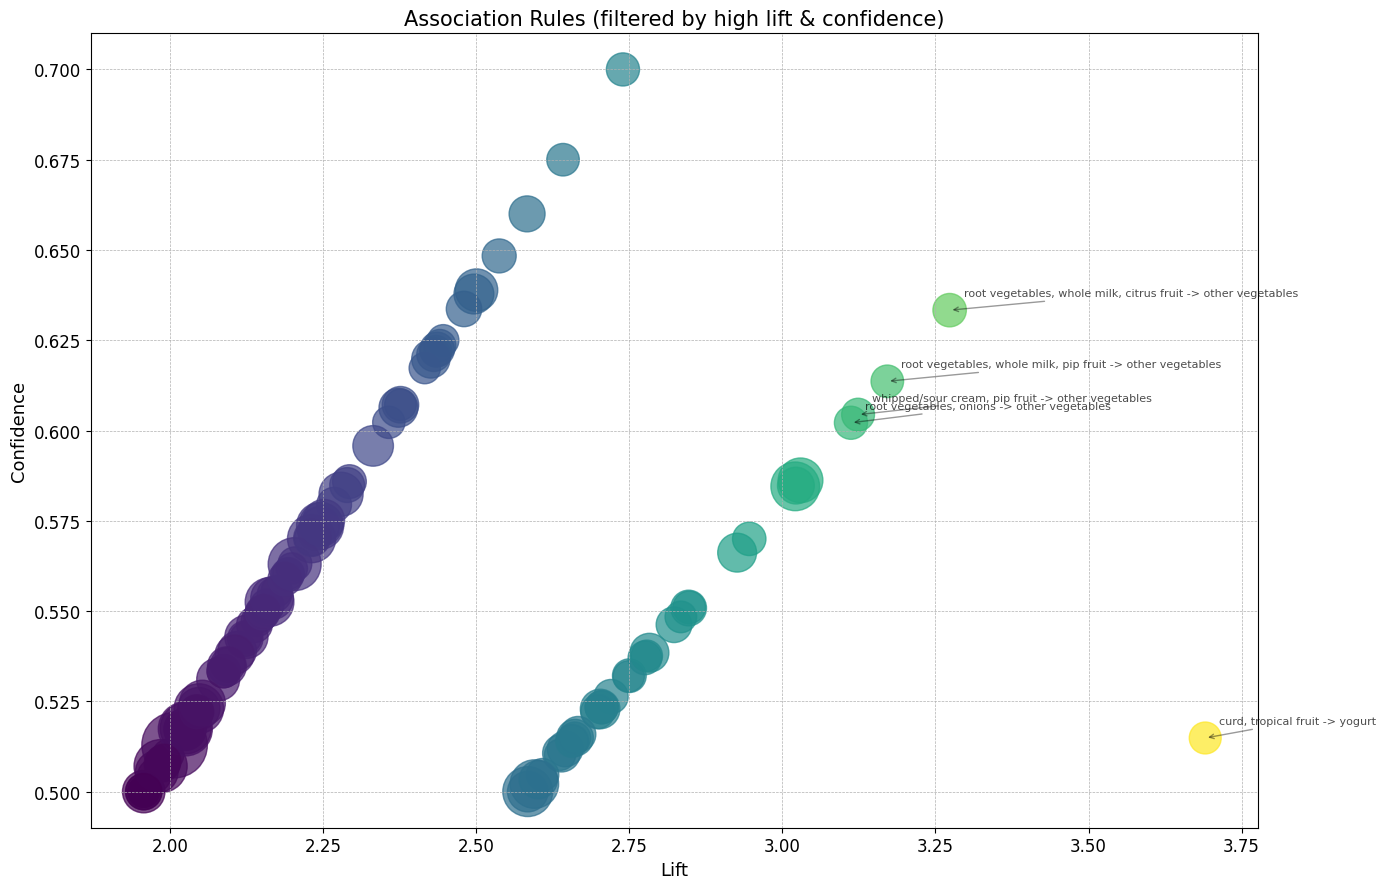

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 9))

# Vary point size based on support
point_sizes = 50 * (filtered_rules['support'] * 2000)

# Create scatter plot
sc = plt.scatter(filtered_rules['lift'], filtered_rules['confidence'], c=filtered_rules['lift'],
                 cmap='viridis', s=point_sizes, alpha=0.7)

# Sort rules by lift and only annotate the top 5
top_rules = filtered_rules.sort_values(by='lift', ascending=False).head(5)

for idx, row in top_rules.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    plt.annotate(f"{antecedents} -> {consequents}",
                 (row['lift'], row['confidence']), fontsize=8, alpha=0.7, xytext=(10,10),
                 textcoords='offset points', arrowprops=dict(arrowstyle="->", alpha=0.4))

# Set the title and labels
plt.title('Association Rules (filtered by high lift & confidence)', fontsize=15)
plt.xlabel('Lift', fontsize=13)
plt.ylabel('Confidence', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


### Insights from the Provided Rules:

**Yogurt and Tropical Fruit**:

The combination of (**curd, tropical fruit**) has a strong association with **yogurt**, boasting a lift of **3.69**. This means that customers who buy curd and tropical fruit are nearly **3.7 times** more likely to also buy yogurt than the average customer.The confidence of this rule is 0.514, implying that in over 51% of transactions that have curd and tropical fruit, yogurt is also purchased.

**Vegetables and Dairy**:

Items like **root vegetables** and **whole milk**, when combined with **citrus fruit** or **pip fruit**, show a strong association with **other vegetables**. This suggests that customers who buy these combinations often prefer to add other vegetables to their basket.The lift values for these combinations are **above 3**, underscoring the strength of these associations.

**Specific Combinations**:

The association between (whipped/sour cream, pip fruit) and other vegetables, and the association between (root vegetables, onions) and other vegetables, indicate specific purchase behaviors. Customers who buy whipped/sour cream and pip fruit or root vegetables and onions have a high inclination to purchase other vegetables.

**'Whole Milk' in Retail Association Rules**:

In our initial exploration of association rules, we observed that 'whole milk' frequently appeared as a consequent. This piqued our curiosity: is 'whole milk' inherently a popular item, or are there specific combinations of items that influence its purchase? To answer this, we decided to delve deeper into the patterns surrounding 'whole milk'.

In [ ]:
# Analyze the support of "whole milk" alone
whole_milk_support = groceries_onehot['whole milk'].mean()

# Compare with other items
item_supports = groceries_onehot.mean().sort_values(ascending=False)

# Consider conditional confidence
# Filter out rules that have whole milk as a consequent
whole_milk_rules = rules[rules['consequents'] == {'whole milk'}].sort_values(by='confidence', ascending=False)

whole_milk_support, item_supports.head(10), whole_milk_rules.head(10)

(0.25551601423487547,
 whole milk          0.255516
 other vegetables    0.193493
 rolls/buns          0.183935
 soda                0.174377
 yogurt              0.139502
 bottled water       0.110524
 root vegetables     0.108998
 tropical fruit      0.104931
 shopping bags       0.098526
 sausage             0.093950
 dtype: float64,
                                          antecedents   consequents  \
 2855       (yogurt, tropical fruit, root vegetables)  (whole milk)   
 2729  (other vegetables, root vegetables, pip fruit)  (whole milk)   
 1452                    (butter, whipped/sour cream)  (whole milk)   
 2443                 (whipped/sour cream, pip fruit)  (whole milk)   
 1456                                (yogurt, butter)  (whole milk)   
 1438                       (butter, root vegetables)  (whole milk)   
 1672                          (curd, tropical fruit)  (whole milk)   
 2743           (other vegetables, yogurt, pip fruit)  (whole milk)   
 1739                 

**Support of "whole milk"**:

The support value for "whole milk" is approximately 0.2555, which means that around 25.55% of all transactions in the dataset include "whole milk".

**Top 10 items by support**:

When comparing the support of "whole milk" to other items, "whole milk" has the highest support, followed by "other vegetables", "rolls/buns", "soda", and "yogurt". This shows that "whole milk" is indeed one of the most commonly purchased items.

**Top 10 association rules with "whole milk" as the consequent**:

The rules presented show combinations of items that, when purchased together, often lead to the purchase of "whole milk". For instance, customers who buy "yogurt", "tropical fruit", and "root vegetables" together have a strong likelihood of also buying "whole milk". This is evident from the high confidence value of approximately 0.75 and the lift value of around 2.96, which indicates that this particular combination of items increases the likelihood of purchasing "whole milk" by almost 3 times compared to when these items are not purchased.

**In summary**, "whole milk" is indeed one of the most commonly purchased items in the dataset. **Furthermore**, certain combinations of items significantly increase the likelihood of "whole milk" being purchased. The association rules provided give insights into these combinations, which can be valuable for strategies such as cross-selling or targeted marketing.

# Question 9: Image classification with neural networks

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_path = 'STA380/data/EuroSAT_RGB'

# Define transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Load the dataset using ImageFolder
dataset = ImageFolder(root=data_path, transform=transform)

# Split the dataset into training and test sets (80/20 split)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create data loaders for training and test sets
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Get the class labels
class_labels = dataset.classes


In [ ]:
class SatelliteClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SatelliteClassifier, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 16 * 16, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

# Initialize the model
model = SatelliteClassifier(num_classes=len(class_labels))


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item():.4f}")

print("Training completed.")

Epoch [1/10] Loss: 0.8382
Epoch [2/10] Loss: 0.9484
Epoch [3/10] Loss: 0.4948
Epoch [4/10] Loss: 0.8967
Epoch [5/10] Loss: 0.7794
Epoch [6/10] Loss: 0.2240
Epoch [7/10] Loss: 0.2733
Epoch [8/10] Loss: 0.1800
Epoch [9/10] Loss: 0.3176
Epoch [10/10] Loss: 0.3331
Training completed.


In [ ]:
model.eval()
correct = 0
total = 0
predicted_classes = []
actual_classes = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_classes.extend(predicted.cpu().numpy())
        actual_classes.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f"Test Set Accuracy: {accuracy:.2f}%")


Test Set Accuracy: 81.75%


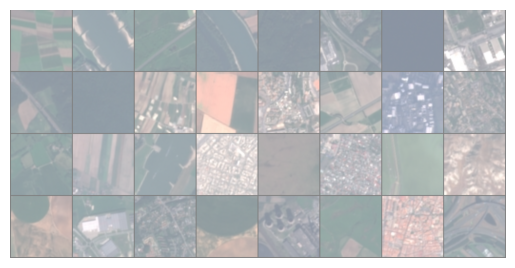

The accuracy of prediction on these test images are:
Actual --- Predicted
AnnualCrop --- AnnualCrop
River --- River
Highway --- Pasture
River --- River
Forest --- Forest
Highway --- Highway
SeaLake --- SeaLake
Industrial --- Industrial
Highway --- Highway
Forest --- SeaLake
PermanentCrop --- Industrial
AnnualCrop --- AnnualCrop
Residential --- Residential
Highway --- PermanentCrop
Industrial --- Industrial
Residential --- Residential
Pasture --- Pasture
AnnualCrop --- AnnualCrop
River --- River
Residential --- Residential
HerbaceousVegetation --- HerbaceousVegetation
Residential --- Residential
SeaLake --- SeaLake
HerbaceousVegetation --- HerbaceousVegetation
AnnualCrop --- AnnualCrop
Industrial --- Industrial
Residential --- Residential
AnnualCrop --- AnnualCrop
Industrial --- Residential
Pasture --- Pasture
Residential --- Residential
Highway --- PermanentCrop
26 out of 32 of these images are correctly predicted, test accuracy rate for these images is 81.25%


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Make predictions on the test images
# Initialize the model
model.eval()
model.to(device)

# Number of batches you want to visualize
num_batches = 1

predicted_labels = []
actual_labels = []

for batch_idx, (images, labels) in enumerate(test_loader):
    if batch_idx >= num_batches:
        break

    images, labels = images.to(device), labels.to(device)

    # Make predictions on the test images
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # Display the images and predictions
    imshow(torchvision.utils.make_grid(images.cpu()))
    for actual in labels.cpu().numpy():
      actual_labels.append(class_labels[actual])
    for pred in predicted.cpu().numpy():
      predicted_labels.append(class_labels[pred])

test_length=len(predicted_labels)
count = 0
print('The accuracy of prediction on these test images are:')
print('Actual --- Predicted')
for i in range(test_length):
    print(f'{actual_labels[i]} --- {predicted_labels[i]}')
    if actual_labels[i] == predicted_labels[i]:
        count += 1
print(f'{count} out of {test_length} of these images are correctly predicted, test accuracy rate for these images is {count/test_length:.2%}')

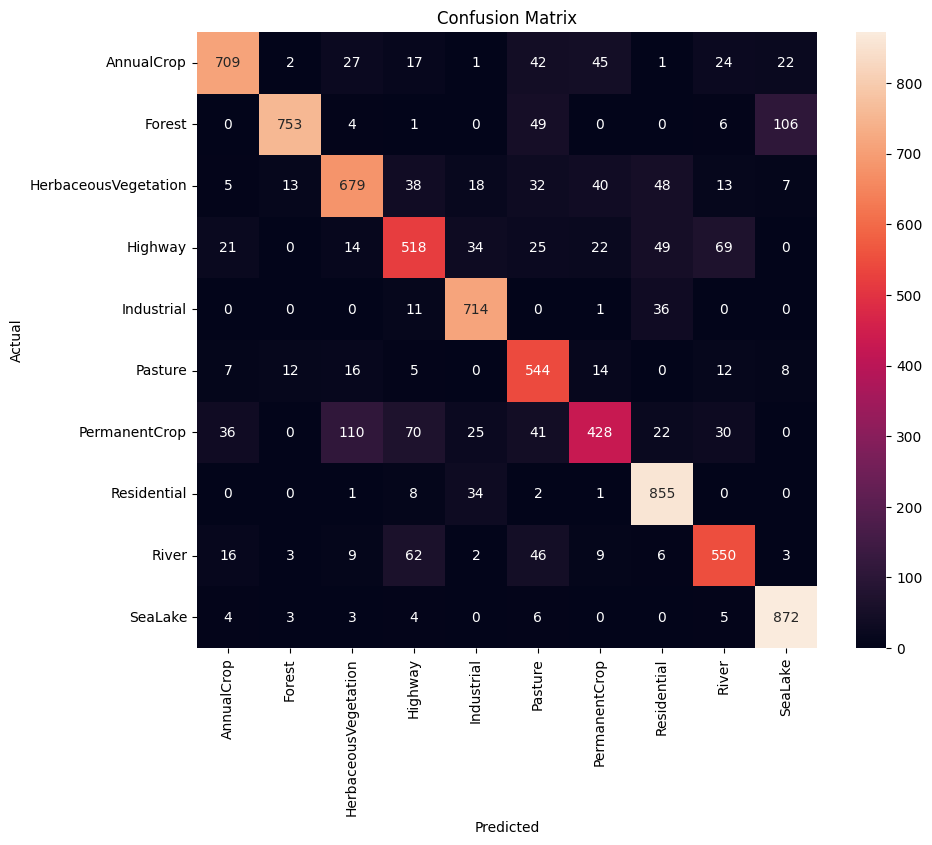

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(actual_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()